In [92]:
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib
from scipy.signal import peak_widths, find_peaks
import os
matplotlib.rcParams['font.sans-serif'] = "Comic Sans MS" # override default font
%matplotlib inline

In [440]:
path = './ladder rung results/'

file_list = []

for file in os.listdir(path):
    if file.endswith('.csv'):
        file_list.append(os.path.join(path, file))
        
print(np.array(sorted(file_list)))

file_list = np.array(sorted(file_list))

['./ladder rung results/Irregular_347_21dpi_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_347_baseline_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_351_21dpi_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_351_3dpi_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_351_baseline_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_357_21dpi_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_357_3dpi_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_357_baseline_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_359_21dpi_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'
 './ladder rung results/Irregular_359_3dpi_croppedDLC_resnet50_Ladder RungMay12shuff

In [437]:
def read_file(file):
    
    pd_dataframe = pd.read_csv(file, header=[1,2])
    filename = file.split('/')[-1].split('_')
    filename = filename[0] + ' ' + filename[1] + ' ' + filename[2]
    return pd_dataframe, filename


def fix_column_names(pd_dataframe):
    
    header_1 = pd_dataframe.columns.get_level_values(0)
    header_2 = pd_dataframe.columns.get_level_values(1)
    col_names = []

    for i in range(len(header_1)):
        col_names.append(' '.join([header_1[i], header_2[i]]))
        
    pd_dataframe.columns = col_names
    
    return pd_dataframe


def filter_predictions(pd_dataframe, bodyparts, threshold):
    
    if type(bodyparts) is list and len(bodyparts) > 1:
        for bodypart in bodyparts:
            pd_dataframe = pd_dataframe[pd_dataframe[bodypart + ' likelihood'] >= threshold]
    
    elif type(bodyparts) is list and len(a) == 1:
        pd_dataframe = pd_dataframe[pd_dataframe[bodyparts[0] + ' likelihood'] >= threshold]
    
    elif type(bodyparts) is str:
        pd_dataframe = pd_dataframe[pd_dataframe[bodyparts + ' likelihood'] >= threshold]
        
    # raise error if any bodypart name not identical as in csv
        
    return pd_dataframe


def plot_data(pd_dataframe, bodyparts, start, end, file_identifier, axis = 'y', threshold = 0):
    
#     if threshold > 0:
#         pd_dataframe = filter_predictions(pd_dataframe, bodyparts, threshold)
        
    plt.figure(figsize=(20,5))
    labels = []
    
    if type(axis) is list:
        
        if type(bodyparts) is list and len(bodyparts) > 1:
            for bodypart in bodyparts:
                plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodypart, axis[0])][start:end], s=1)
                plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodypart, axis[1])][start:end], s=1)
            for which_axis in axis:
                for bodypart in bodyparts:
                    labels.append('%s %s' %(bodypart, which_axis))
                
        elif type(bodyparts) is list and len(bodyparts) == 1:
            plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodyparts[0], axis[0])][start:end], s=1)
            plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodyparts[0], axis[1])][start:end], s=1)
            for which_axis in axis:
                labels.append('%s %s' %(bodyparts[0], which_axis))
            
        elif type(bodyparts) is str:
            plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodyparts, axis[0])][start:end], s=1)
            plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodyparts, axis[1])][start:end], s=1)
            for which_axis in axis:
                labels.append('%s %s' %(bodyparts, which_axis))
    
    else:
        
        if type(bodyparts) is list and len(bodyparts) > 1:
            for bodypart in bodyparts:
                plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodypart, axis)][start:end], s=1)
                labels.append('%s %s' %(bodypart, axis))
        elif type(bodyparts) is list and len(bodyparts) == 1:
            plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodyparts[0], axis)][start:end], s=1)
            labels.append('%s %s' %(bodyparts[0], axis))
        elif type(bodyparts) is str:
            plt.scatter(df['bodyparts coords'][start:end], df['%s %s' %(bodyparts, axis)][start:end], s=1)
            labels.append('%s %s' %(bodyparts, axis))
            
            
    if threshold < 1:
        low_likelihood = np.array(pd_dataframe[pd_dataframe[bodyparts + ' likelihood'] < threshold]['bodyparts coords'])
        low_likelihood = low_likelihood[low_likelihood >= start]
        low_likelihood = low_likelihood[low_likelihood <= end]

        for i in low_likelihood:
    #         print(i)
            plt.axvspan(i, i+1, facecolor='0.2', alpha=0.5)
        
    plt.legend(labels)
    plt.xlabel('n frame')
    plt.ylabel('distance from 0 (pixel)')
    plt.title('%s coordinates by frame' % file_identifier)

In [169]:
def find_slips(pd_dataframe, bodypart, **kwargs): 
        
    peaks, properties = find_peaks(-pd_dataframe['%s y'%bodypart], height=-5000, prominence=(10,100000))
    # peaks, properties = find_peaks(pd_dataframe, prominence=0, distance=18, height=-10, width = 0)
    # width_half = peak_widths(data, peaks, rel_height=0.5)
    
#         peaks, properties = find_peaks(-data, prominence=(10,100000), height=-5000, width = 0)
#         width_half = peak_widths(-data, peaks, rel_height=0.5)
    
    index = pd_dataframe['bodyparts coords'].iloc[:]
    
    is_peak = np.zeros(len(index))
    n_peaks = 0
    current_data = pd_dataframe.iloc[0]
    norm = np.max(pd_dataframe['%s y'%bodypart])
    std = np.std(pd_dataframe['%s y'%bodypart])
    
    for i in range(len(is_peak)):
        
        if i in peaks:
            # is_peak[i] = df['toe y'][i]
            is_peak[i] = norm-std*4
            n_peaks += 1
        
        else:
            is_peak[i] = norm-std*2
            
        current_data = pd_dataframe.iloc[i]
        
        h_peaks = np.mean(properties["prominences"])
        
    return n_peaks, h_peaks, peaks, properties

In [173]:
def plot_slips(pd_dataframe, bodypart, slip_t):
    
    index = pd_dataframe['bodyparts coords'].iloc[:]
    data = pd_dataframe['%s y' %bodypart]
    
#     plt.figure(figsize=(20,8))
#     plt.plot(index, data)
#     plt.scatter(index.iloc[slip_t], data.iloc[slip_t], s=15,color='r')
    plt.legend(['coordinate', 'peak'], loc=3)
    plt.xlabel('n frame')
    plt.ylabel('distance from 0 (pixel)')
    plt.vlines(x=index.iloc[slip_t], ymin=data.iloc[slip_t] + properties["prominences"], ymax=data.iloc[slip_t], color="r")
     
    h_peaks = np.mean(properties["prominences"])    
    print(h_peaks, 'pixels')   

In [ ]:
def jump_filter(pd_dataframe, bodypart):
    
    # loop through

In [49]:
bodyparts = ['HL', 'HR']

In [321]:
file = file_list[6]

df, filename = read_file(file)
df = fix_column_names(df)
df = filter_predictions(df, 'HR', 0)

# df
file

'./ladder rung results/Irregular_370_baseline_croppedDLC_resnet50_Ladder RungMay12shuffle1_500000.csv'

(0, 4000)

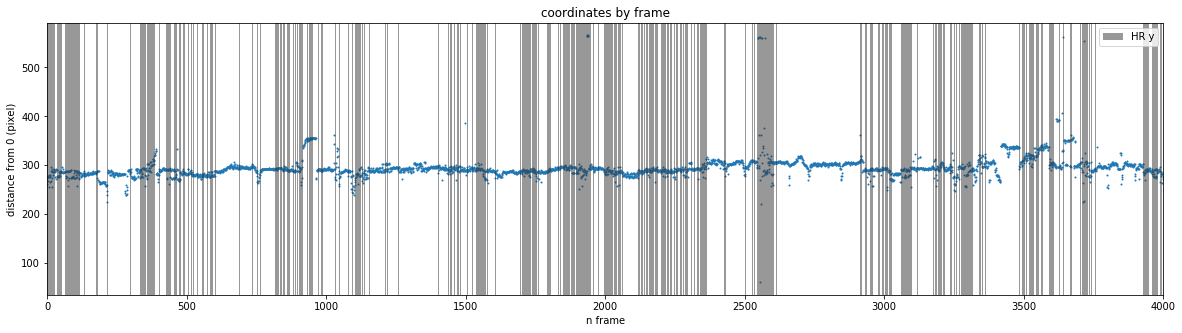

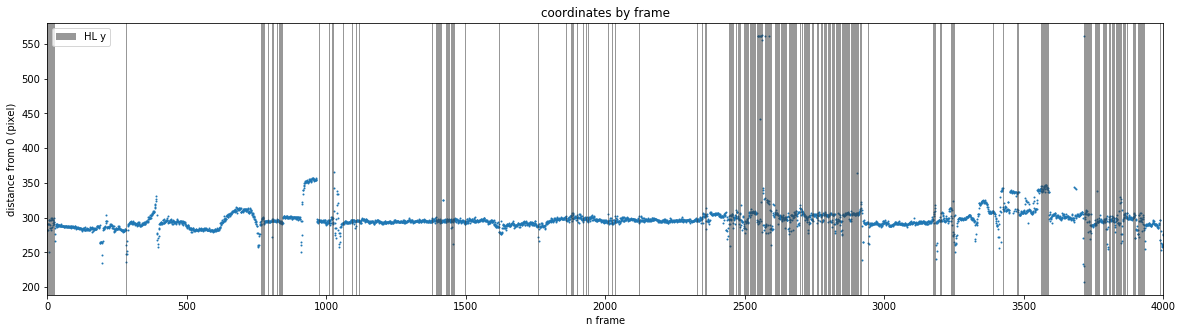

In [414]:
start =0
end = start+4000
plot_data(df, 'HR', start, end, 'y', 0.1)

plt.xlim((start, end))

plot_data(df, 'HL', start, end, 'y', 0.1)

plt.xlim((start, end))

(0, 4000)

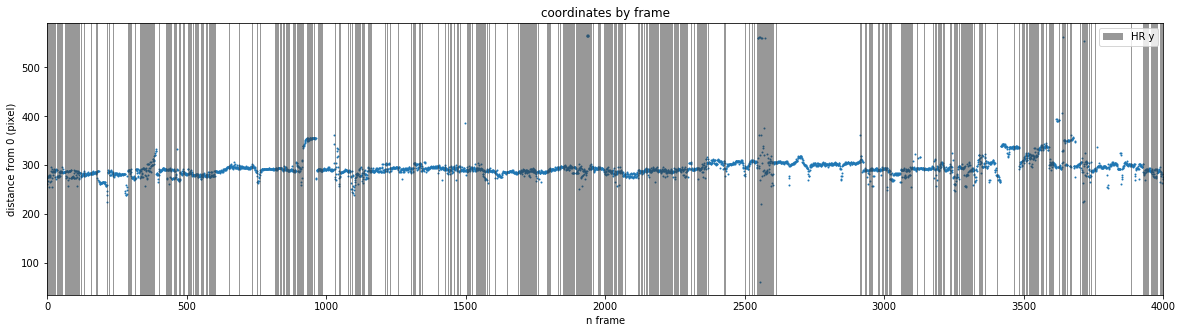

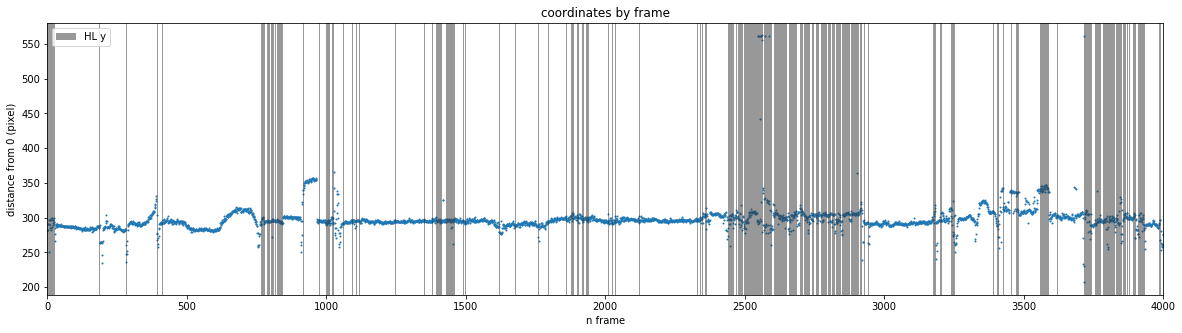

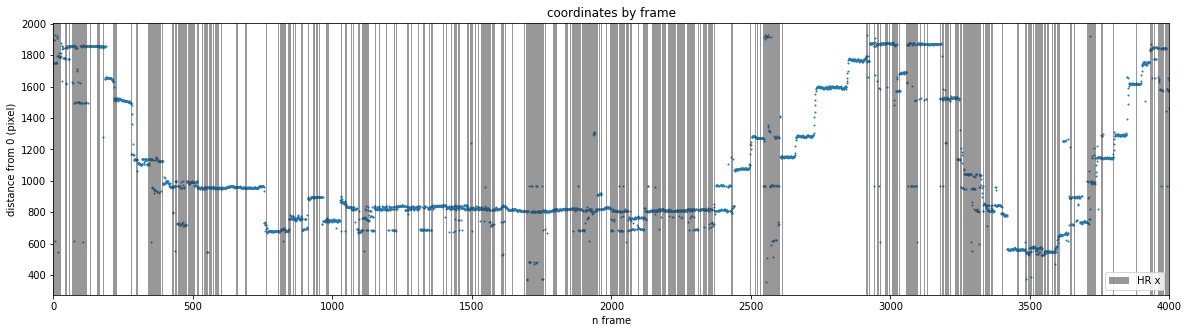

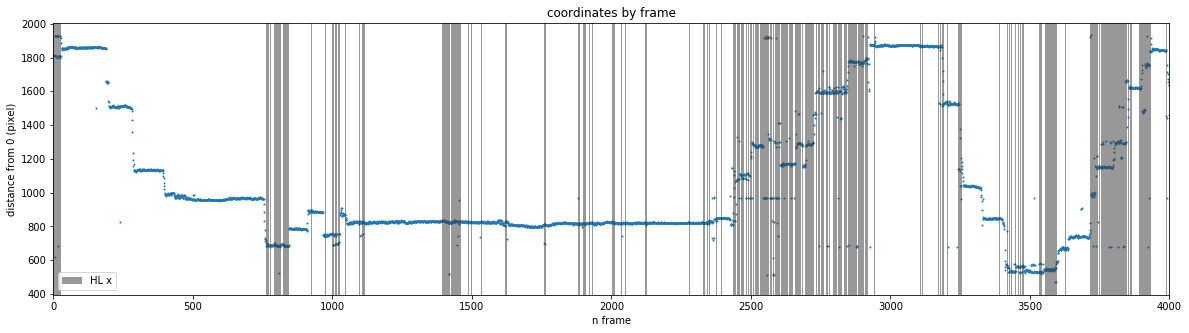

In [415]:
start =0
end = start+4000
plot_data(df, 'HR', start, end, 'y', 0.3)

plt.xlim((start, end))

plot_data(df, 'HL', start, end, 'y', 0.3)

plt.xlim((start, end))

plot_data(df, 'HR', start, end, 'x', 0.3)

plt.xlim((start, end))

plot_data(df, 'HL', start, end, 'x', 0.3)

plt.xlim((start, end))

# plt.savefig('./ambiguous slip 2.jpg')
# plt.savefig('./jumps.jpg')

(0, 4000)

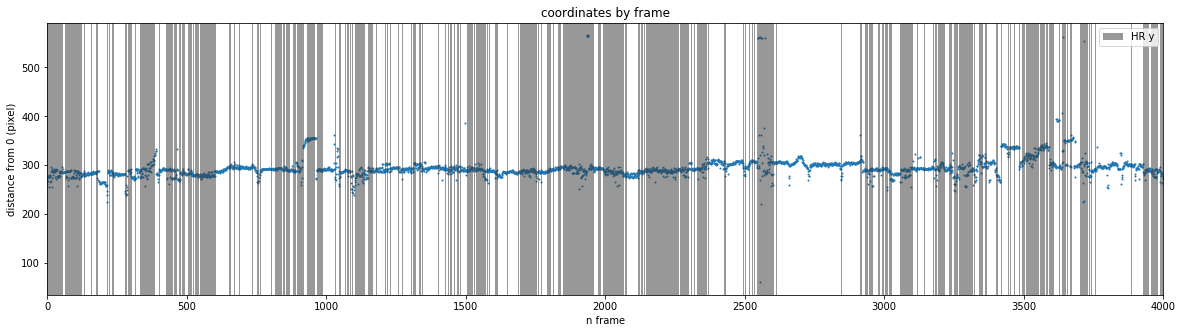

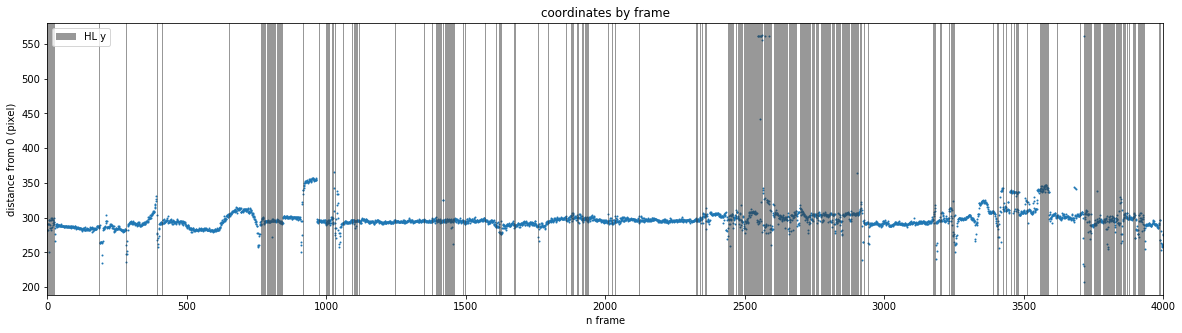

In [411]:
start =0
end = start+4000
plot_data(df, 'HR', start, end, 'y', 0.5)

plt.xlim((start, end))

plot_data(df, 'HL', start, end, 'y', 0.5)

plt.xlim((start, end))

(0, 4000)

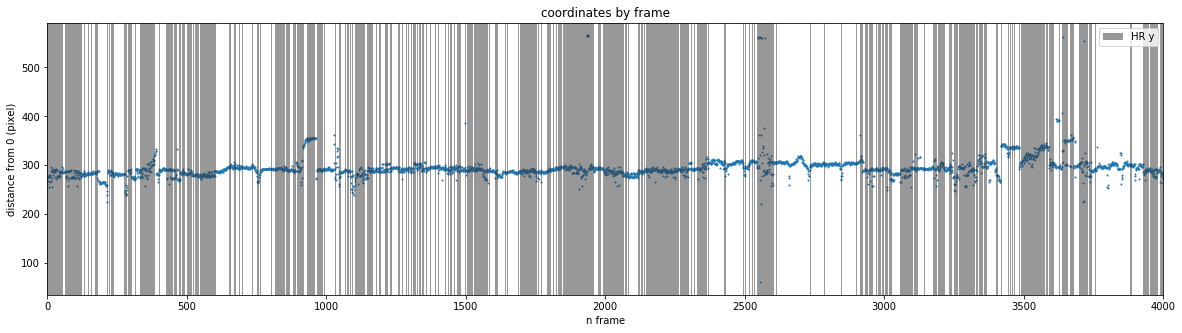

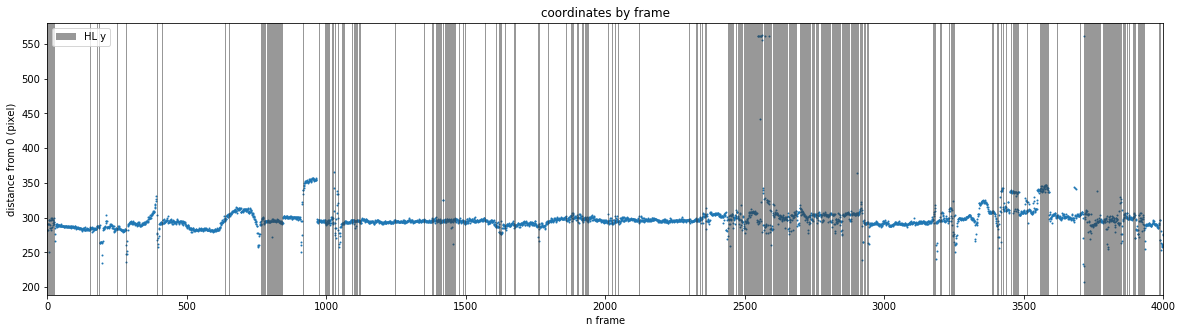

In [412]:
start =0
end = start+4000
plot_data(df, 'HR', start, end, 'y', 0.7)

plt.xlim((start, end))

plot_data(df, 'HL', start, end, 'y', 0.7)

plt.xlim((start, end))

(0, 4000)

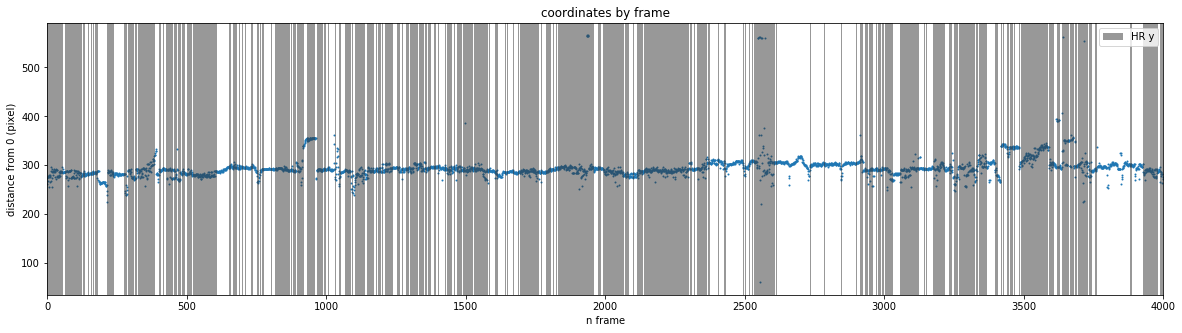

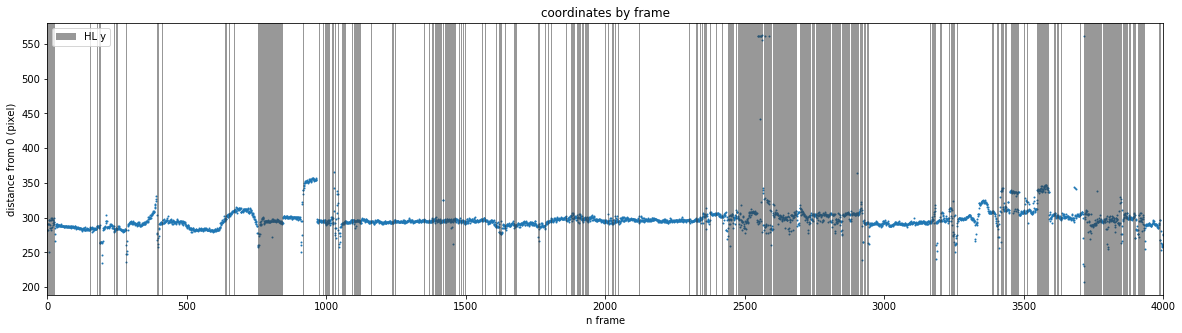

In [413]:
start =0
end = start+4000
plot_data(df, 'HR', start, end, 'y', 0.9)

plt.xlim((start, end))

plot_data(df, 'HL', start, end, 'y', 0.9)

plt.xlim((start, end))

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


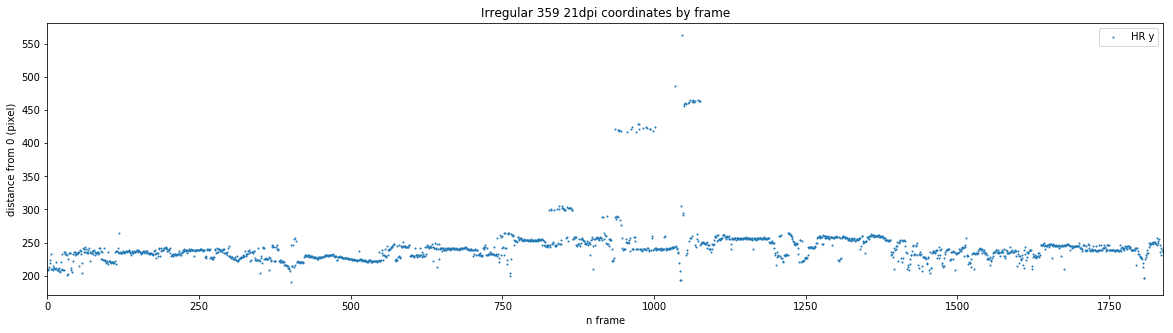

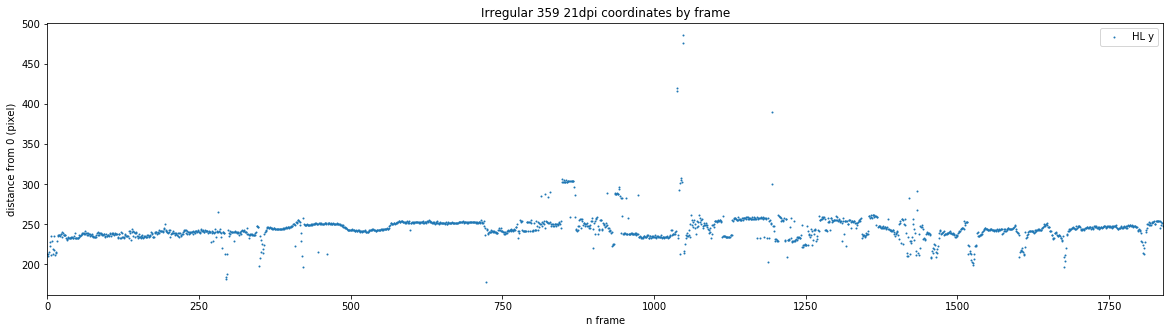

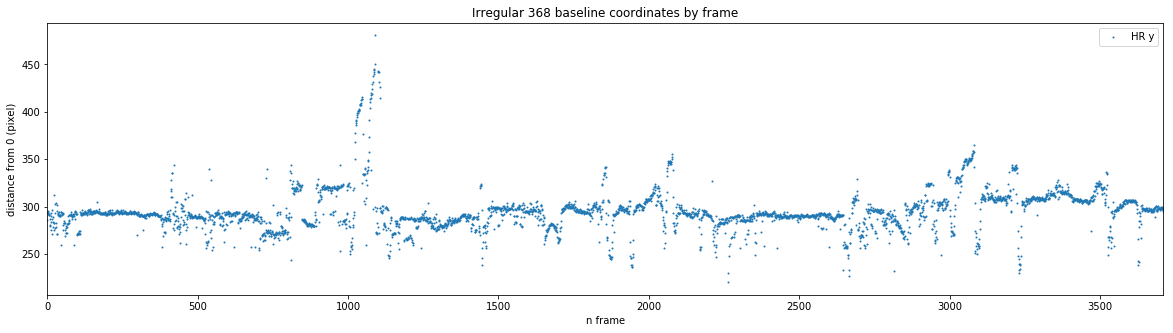

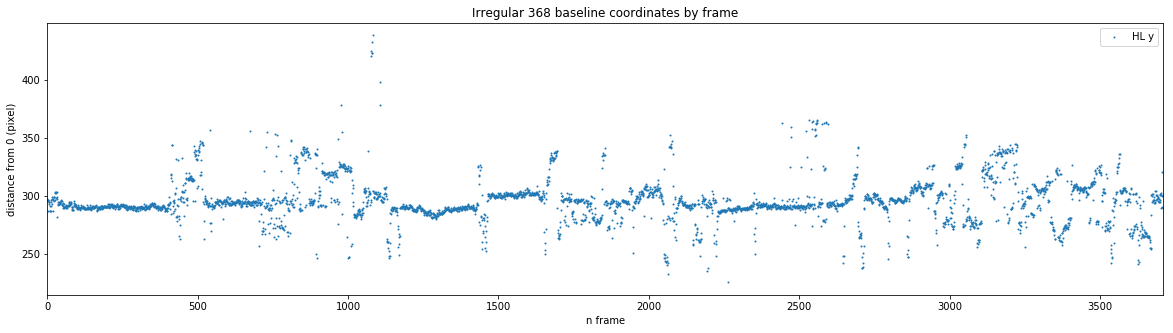

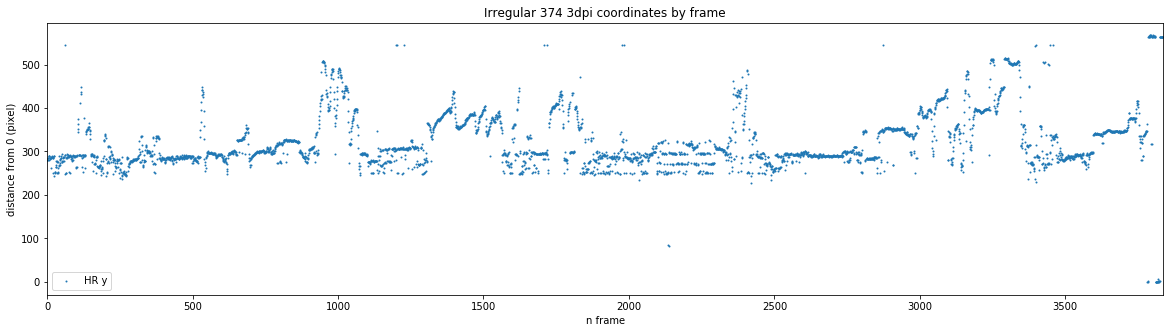

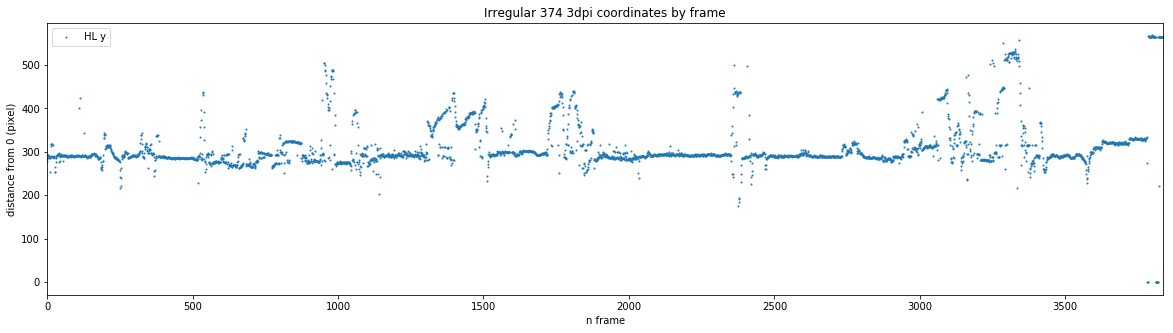

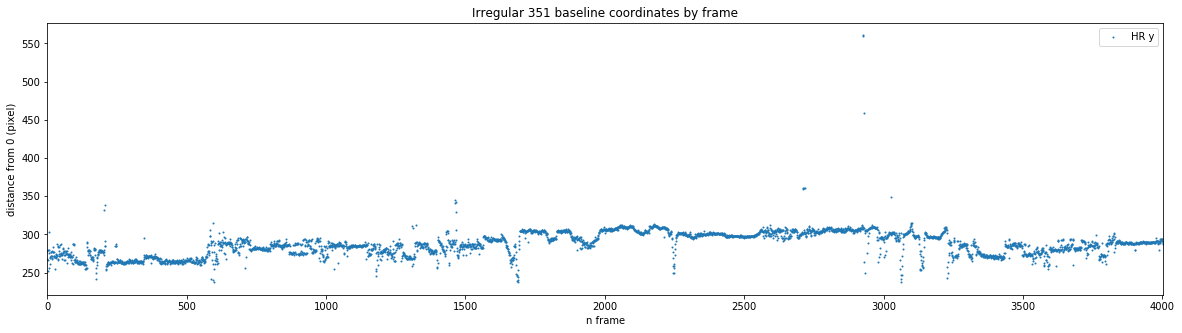

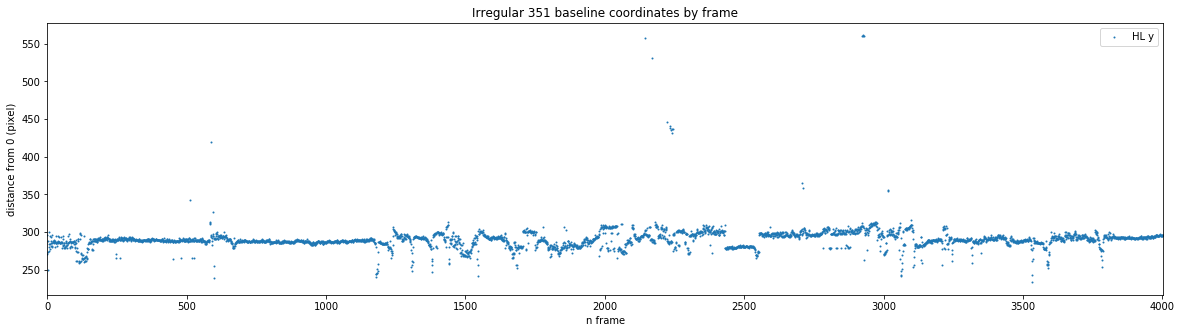

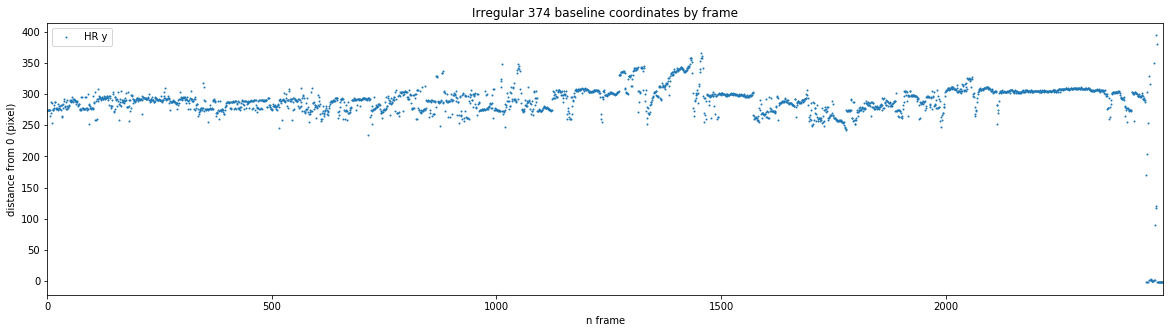

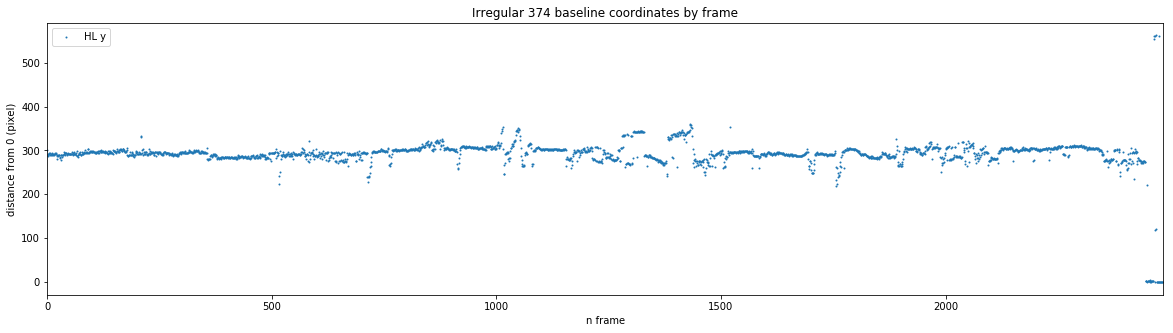

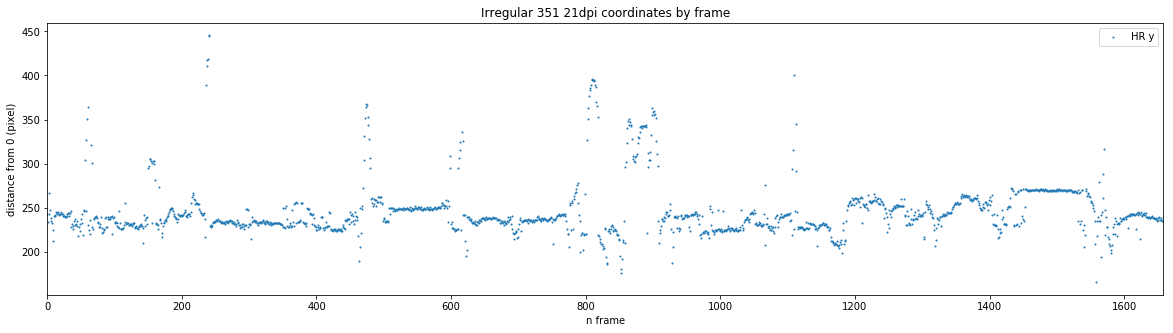

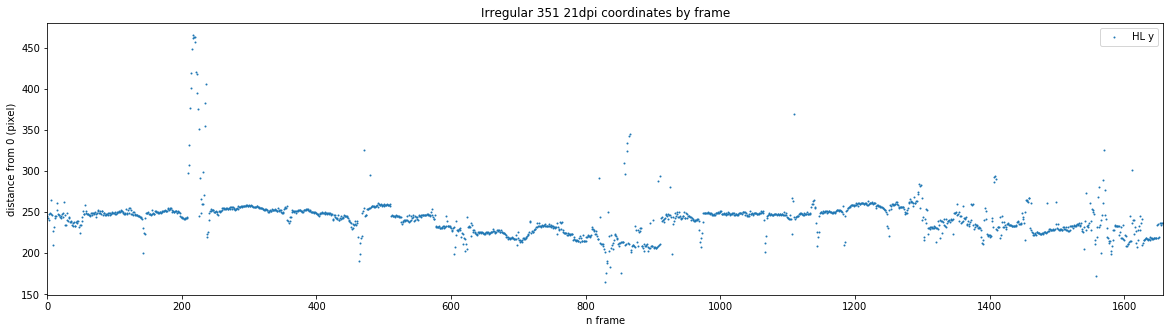

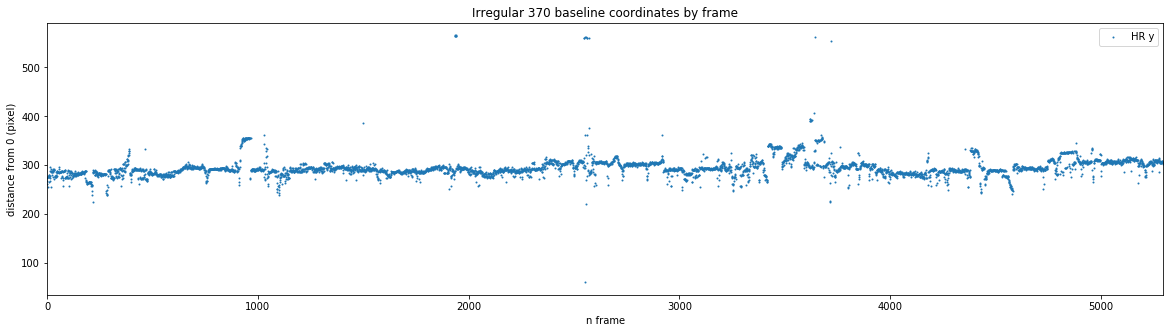

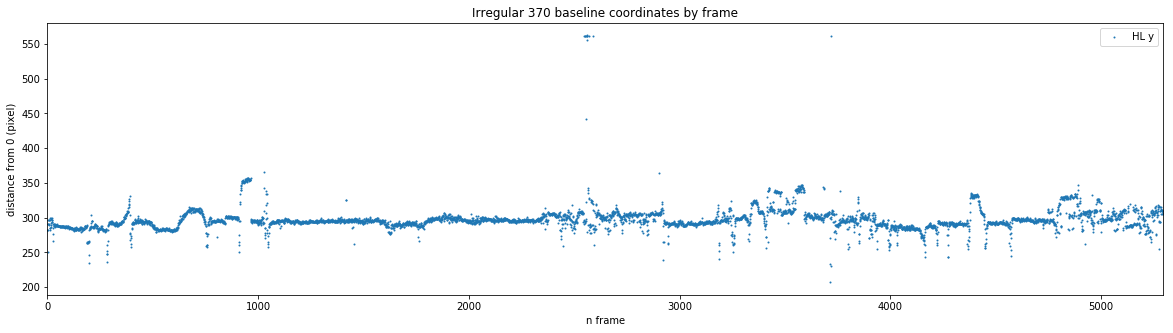

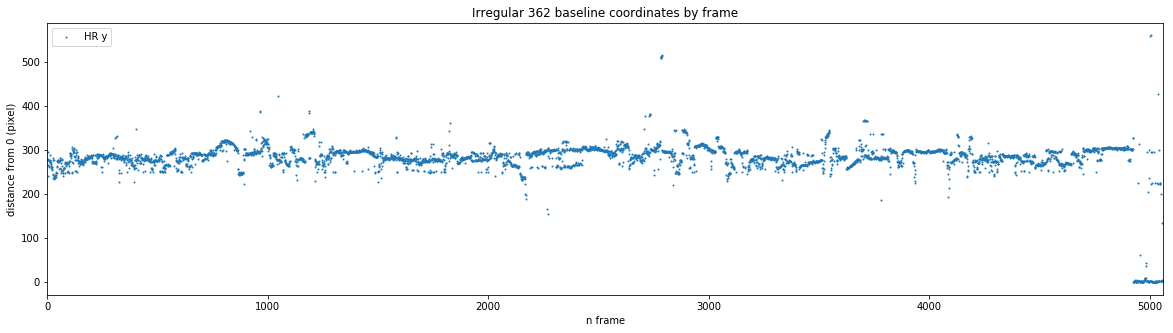

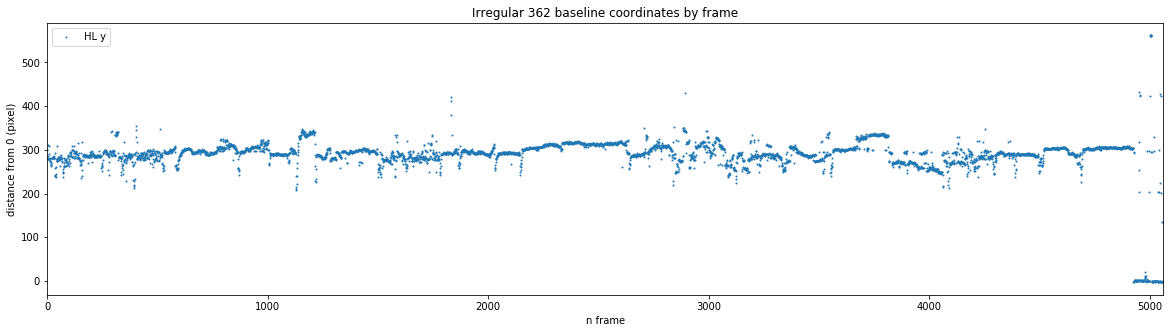

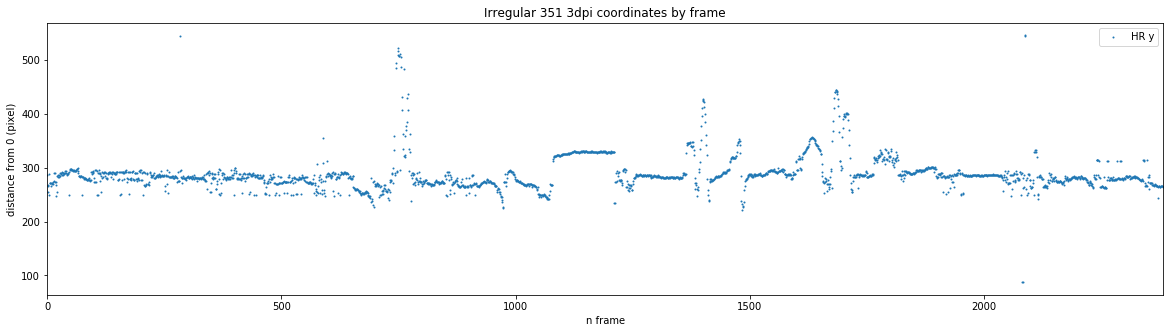

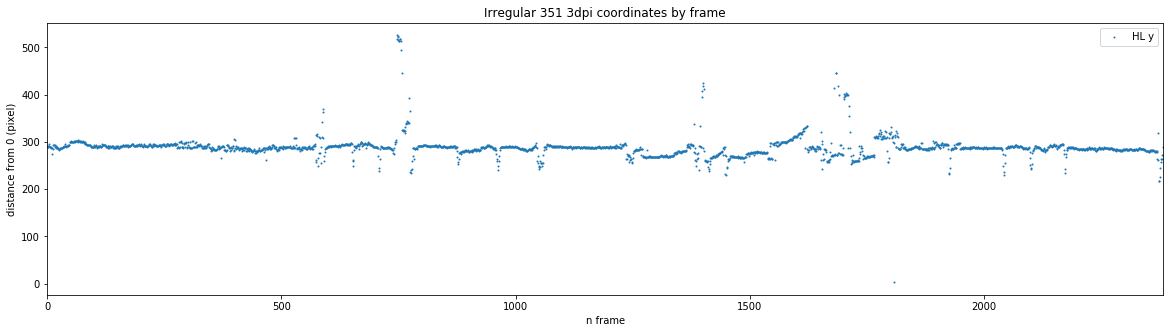

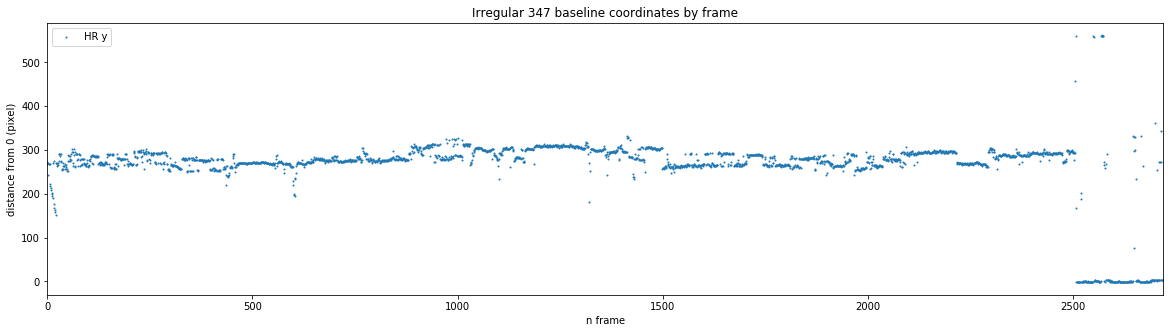

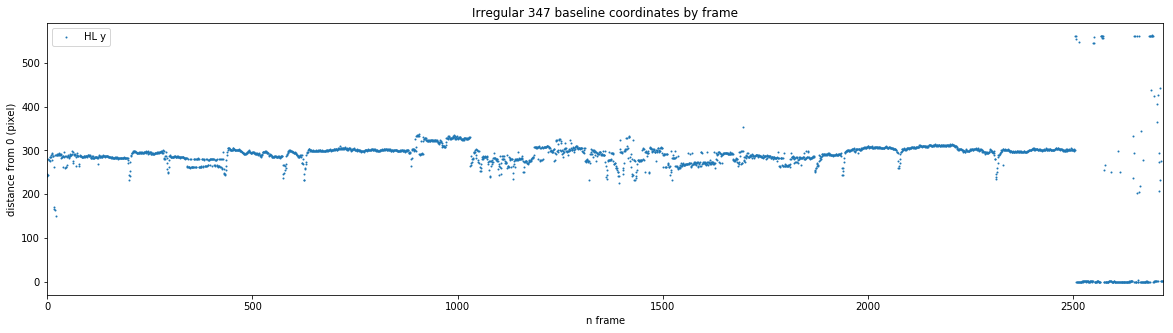

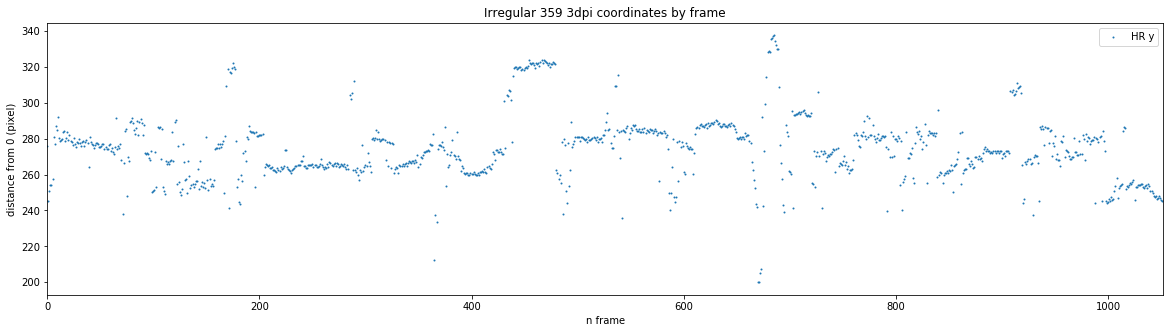

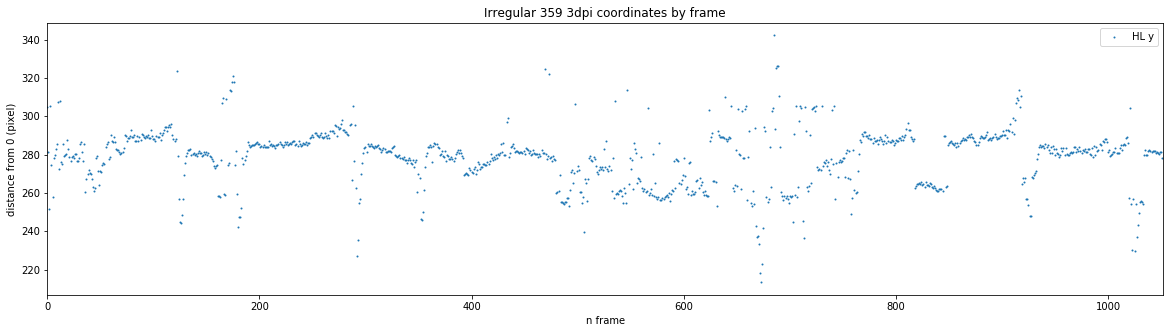

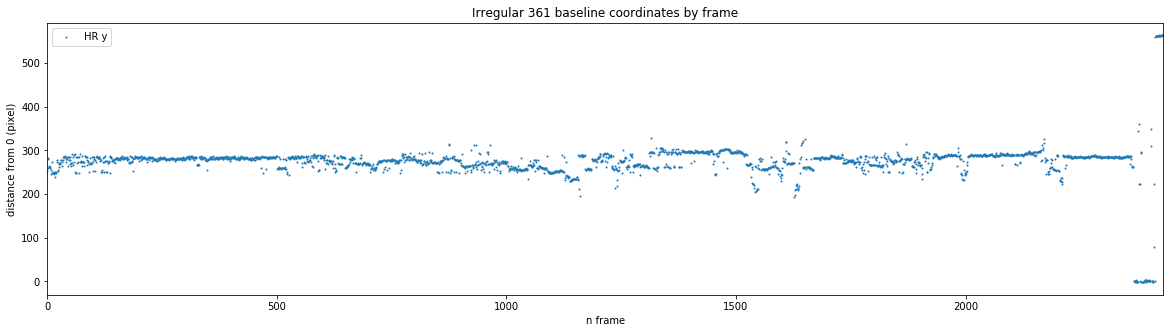

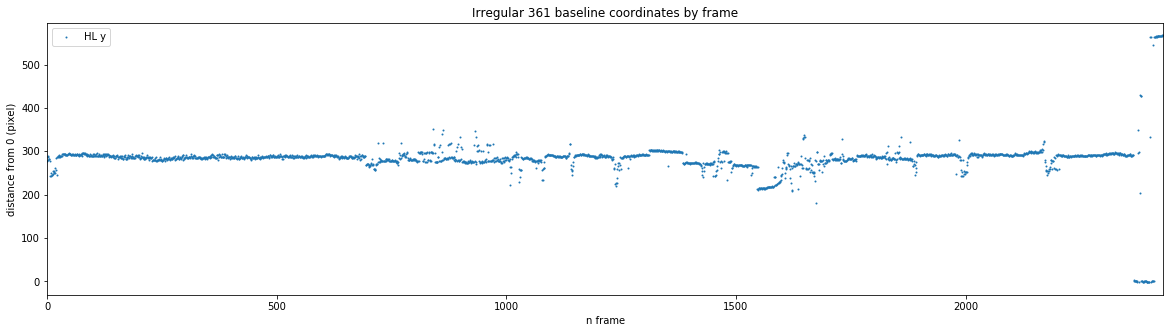

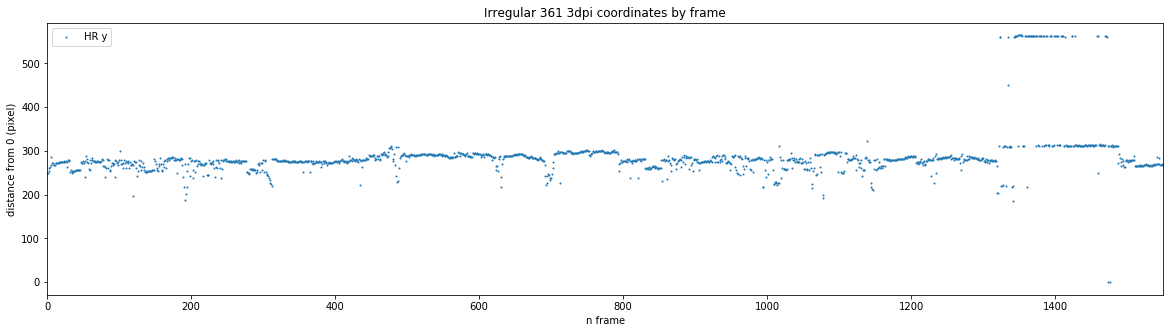

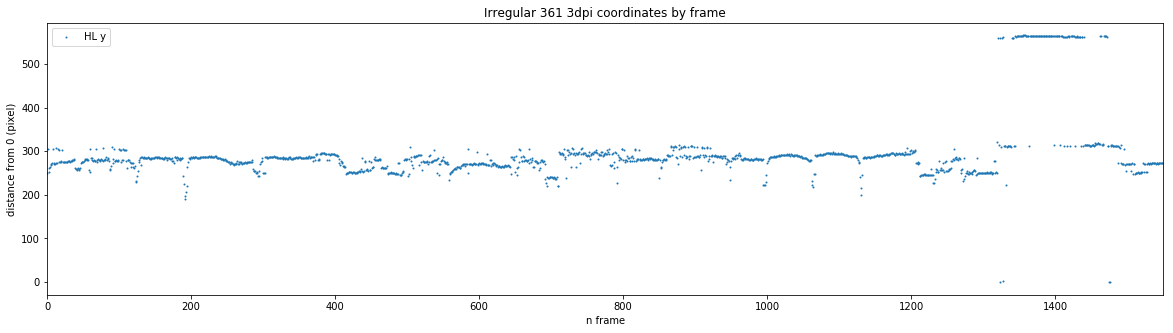

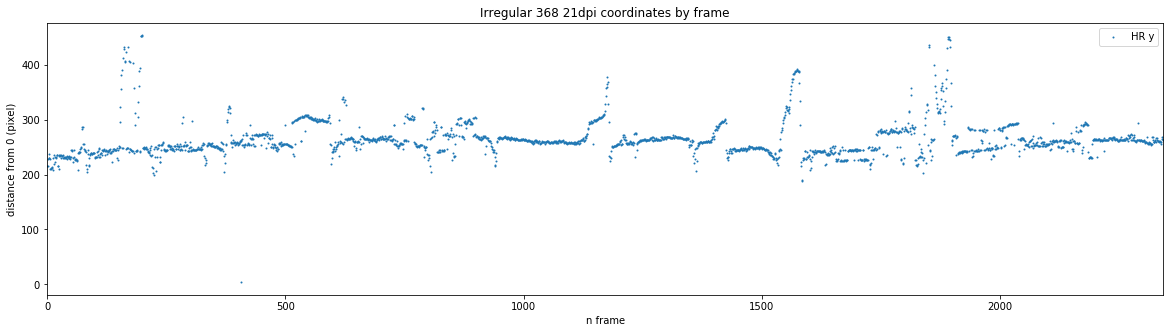

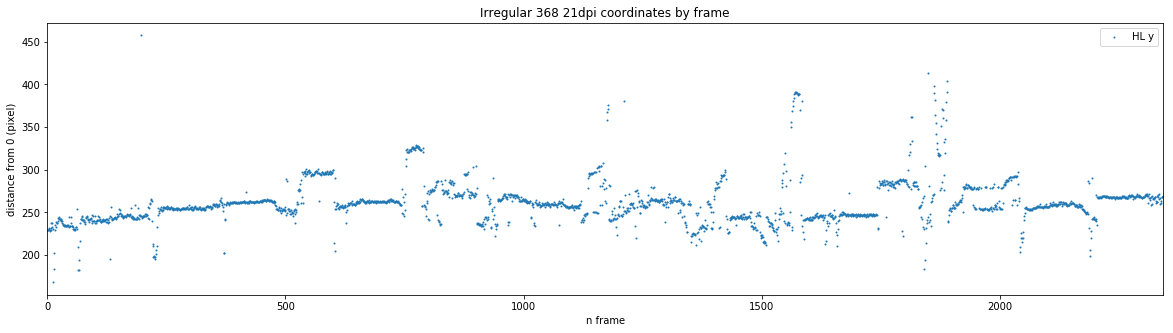

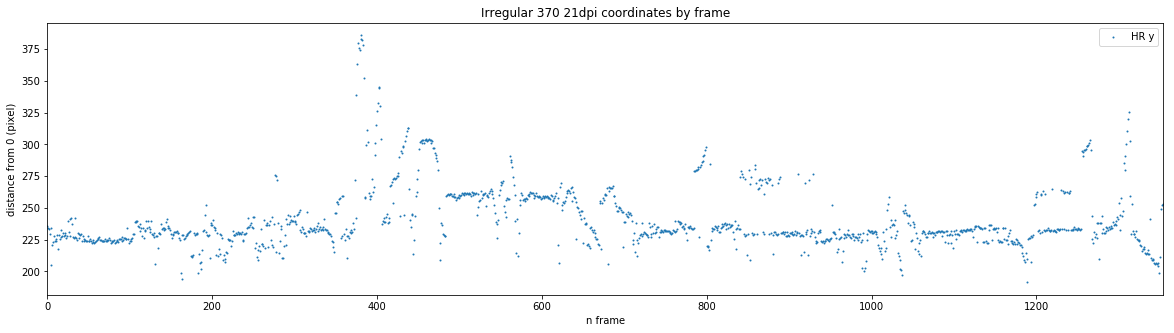

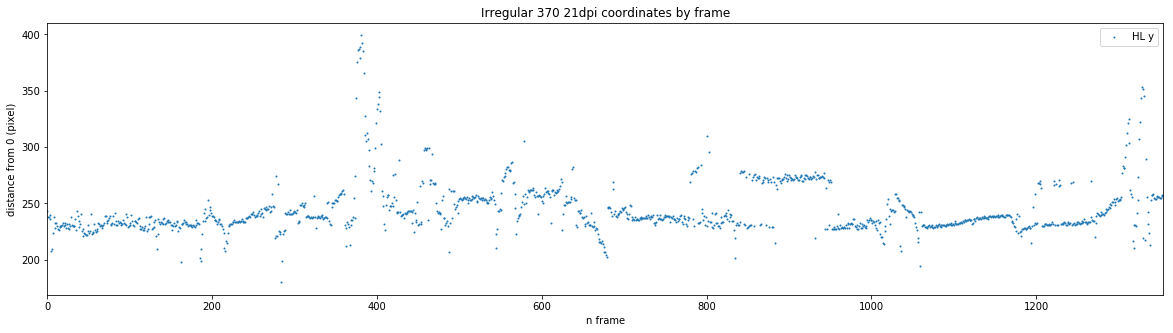

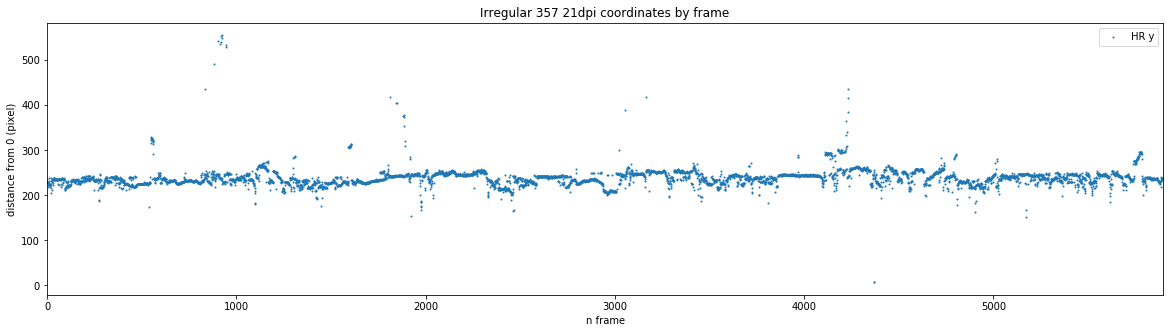

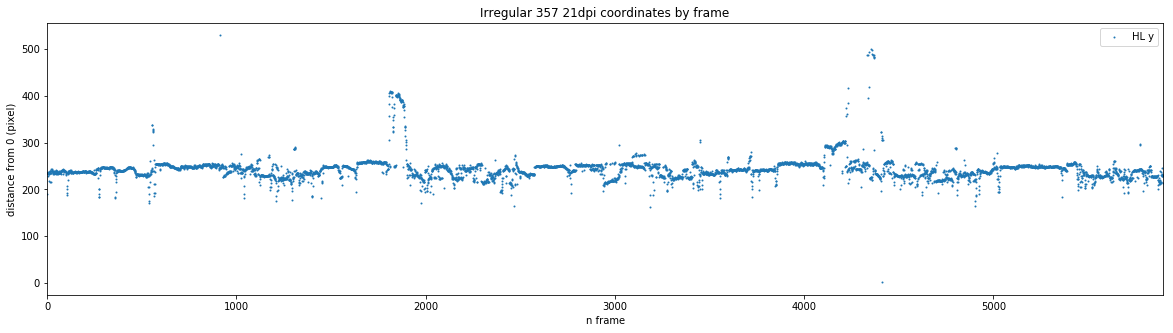

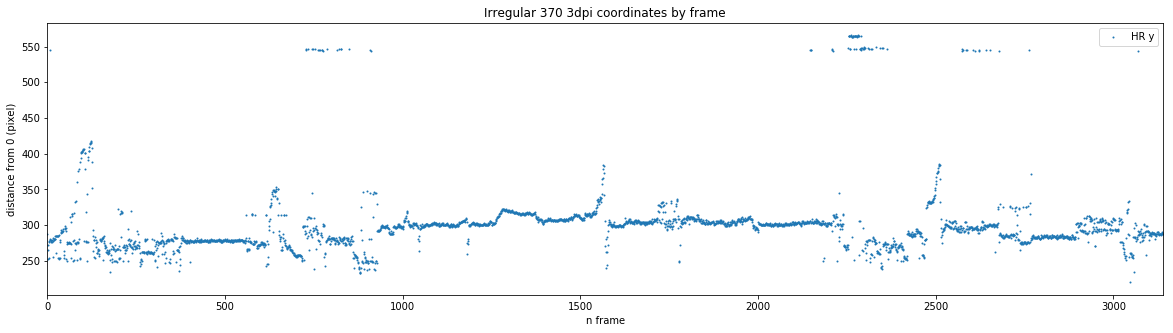

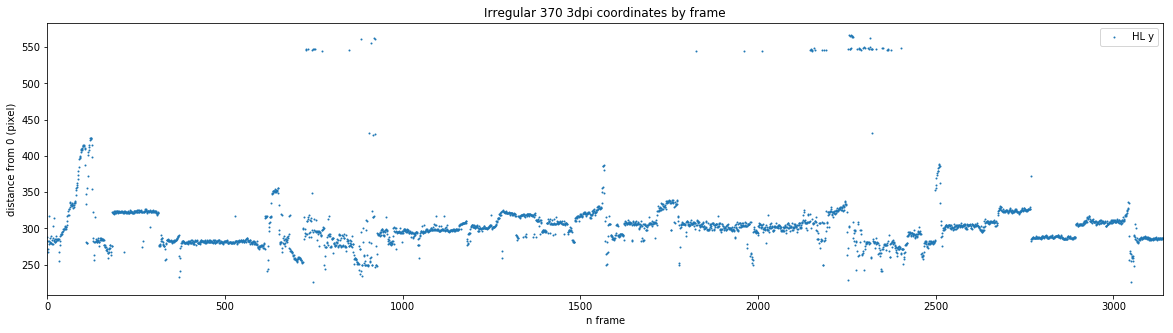

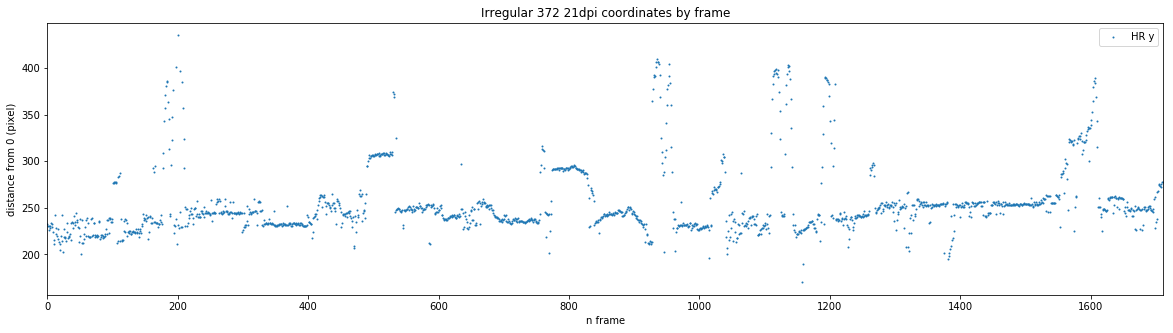

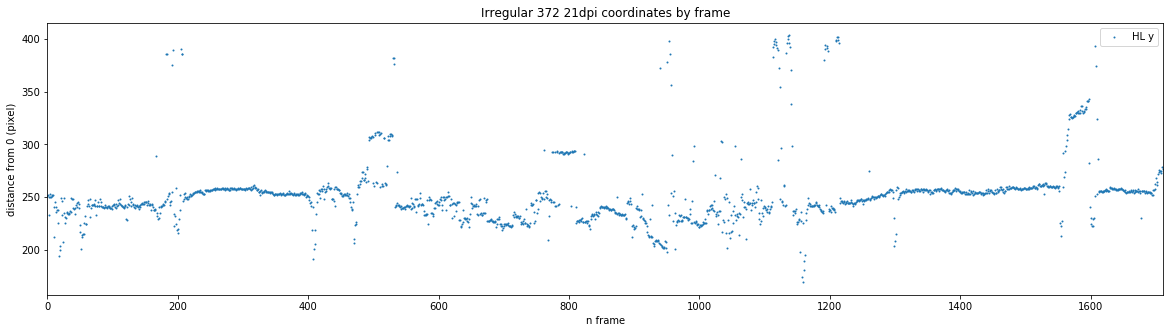

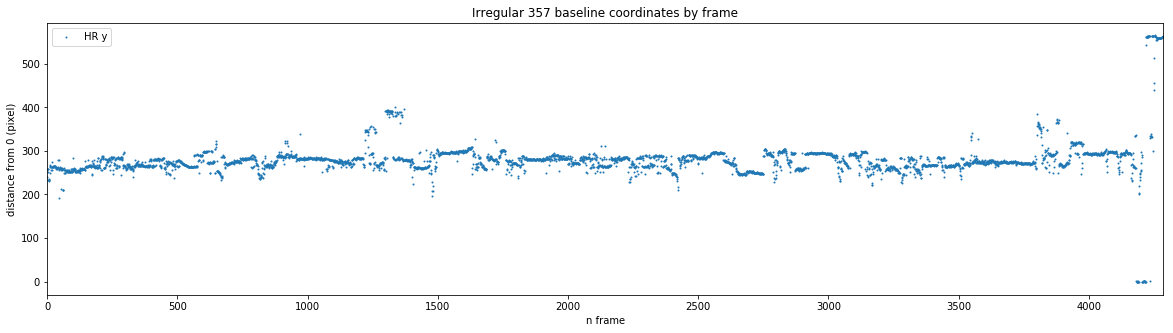

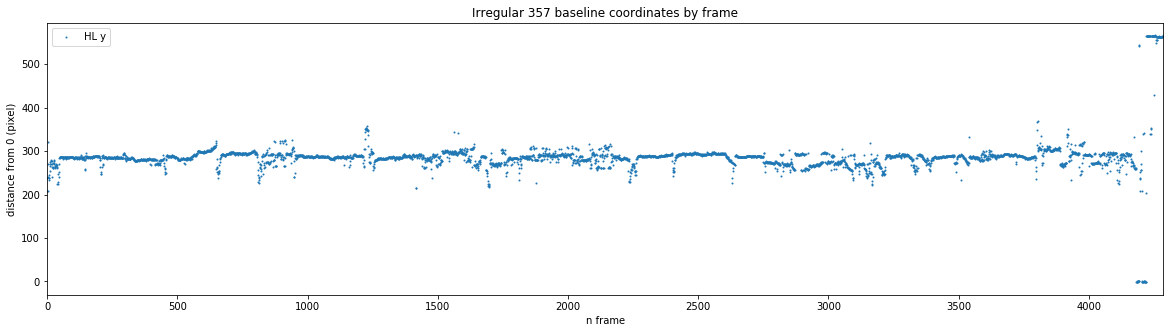

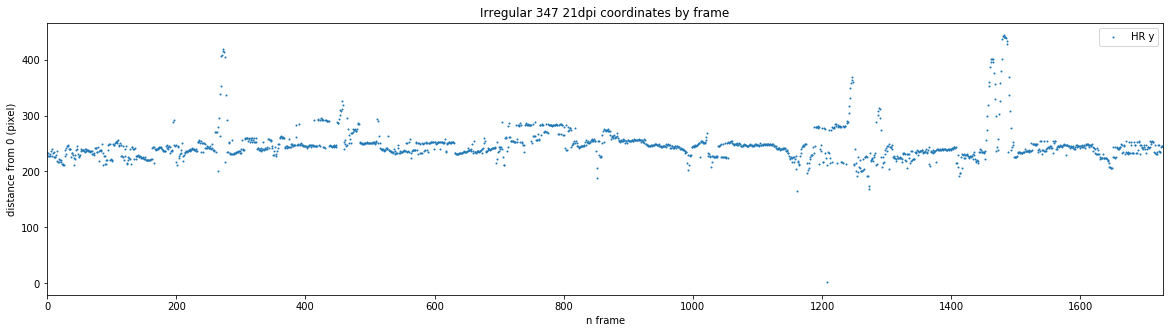

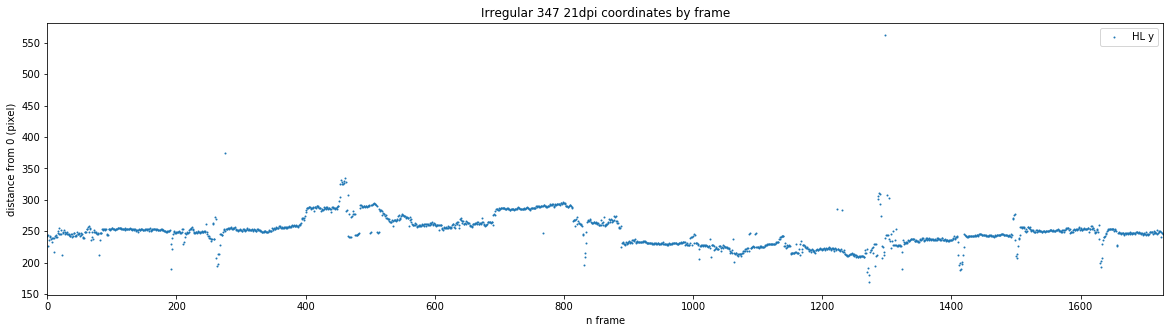

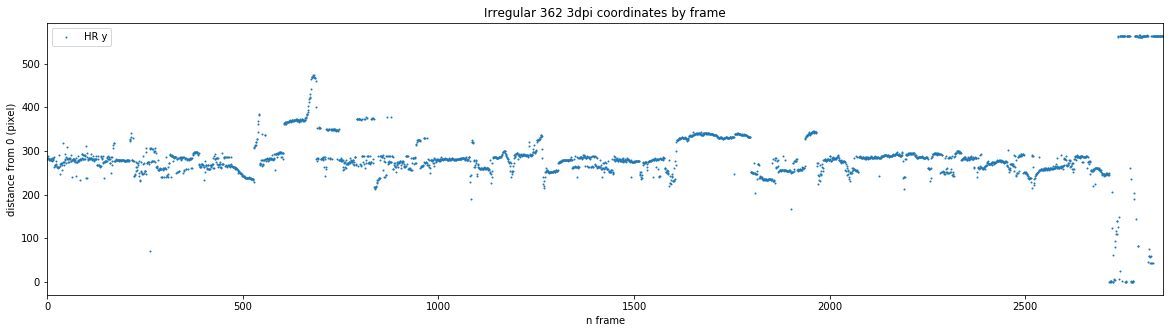

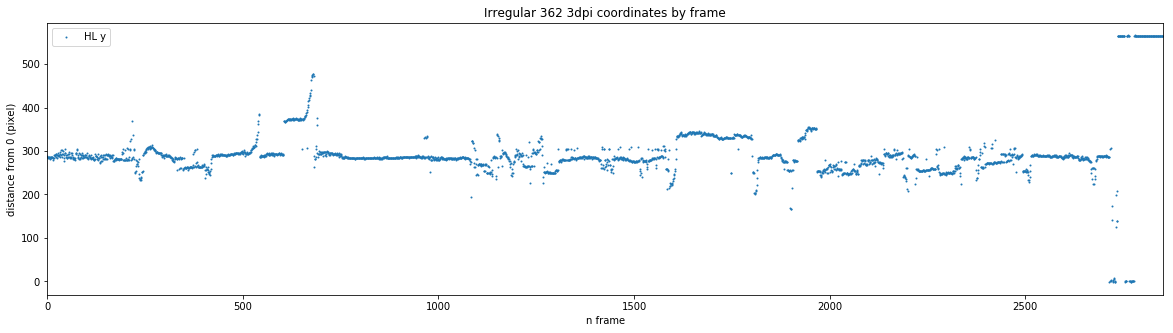

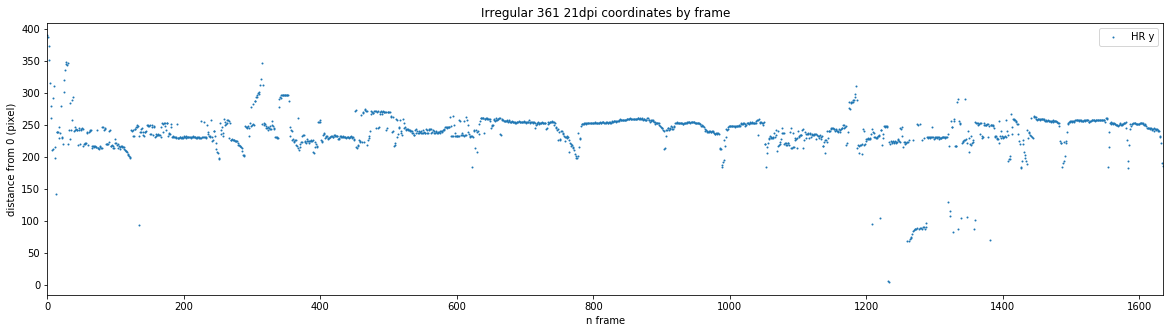

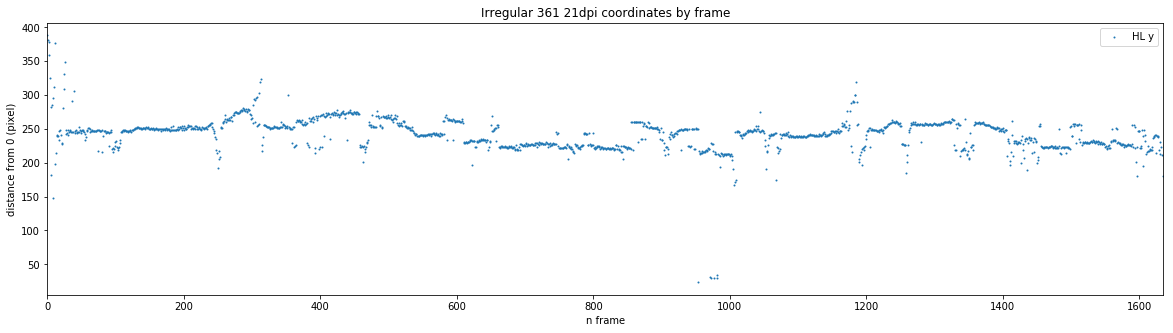

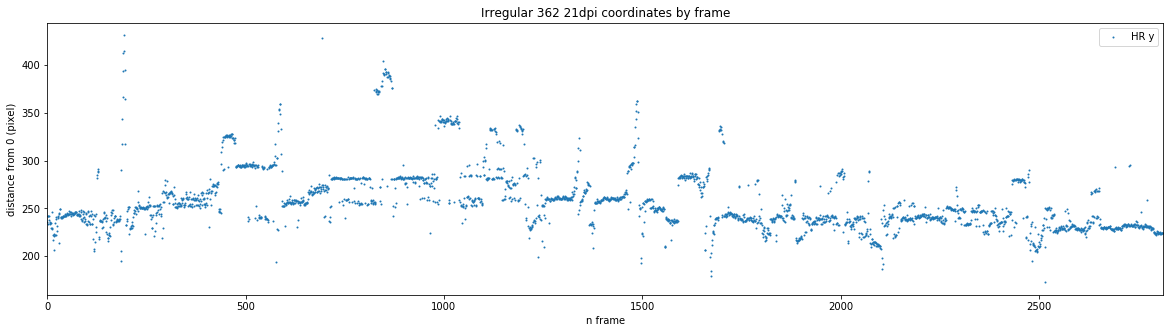

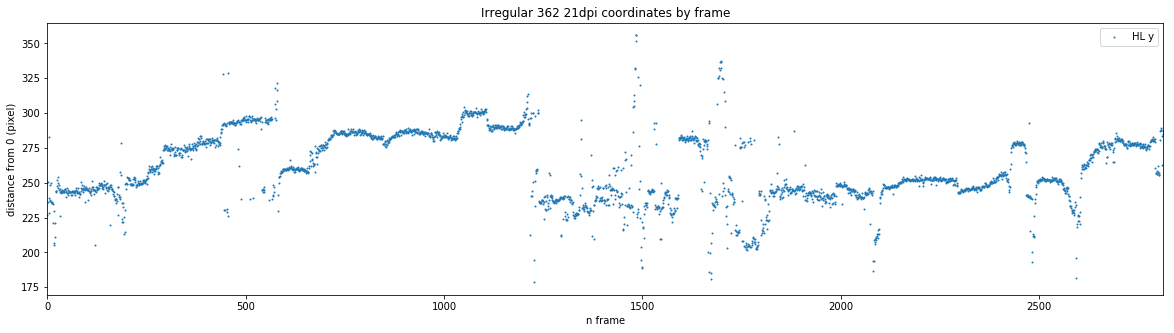

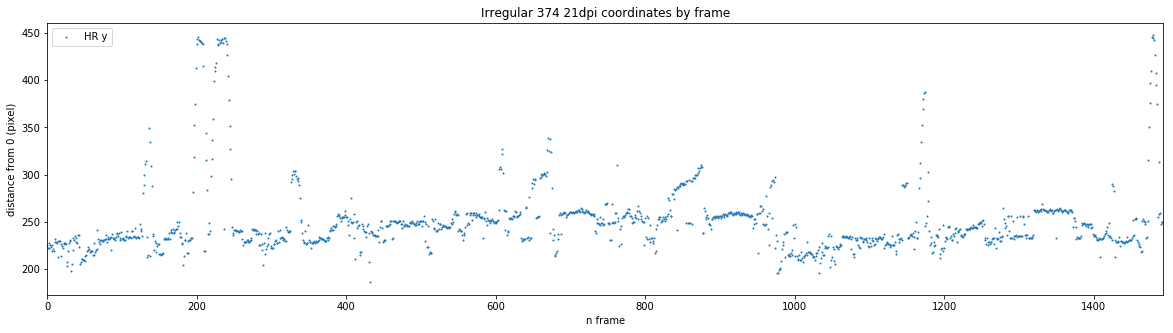

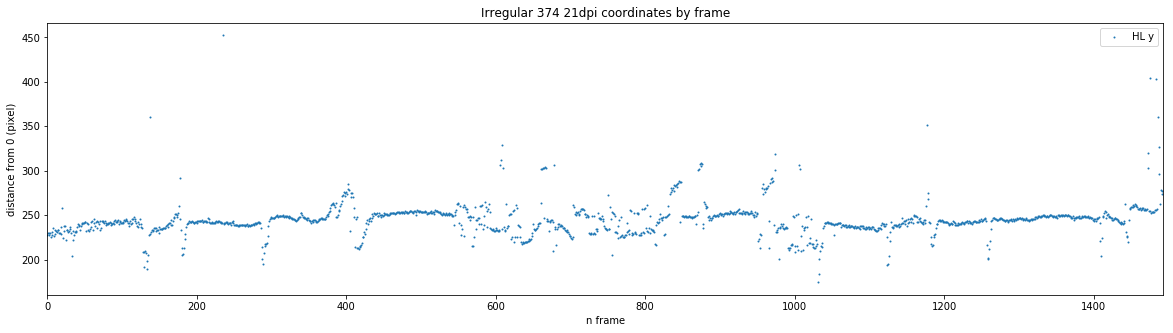

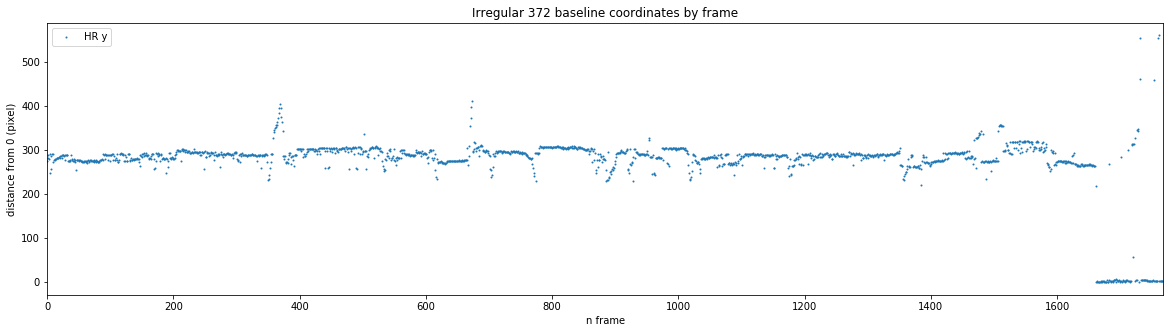

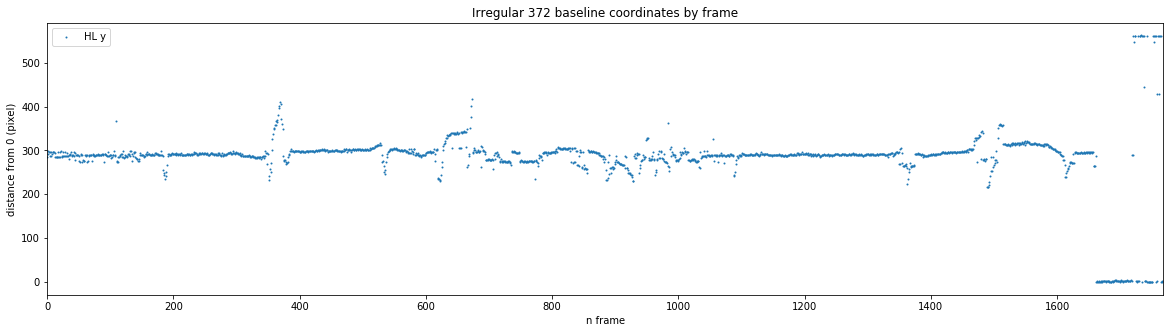

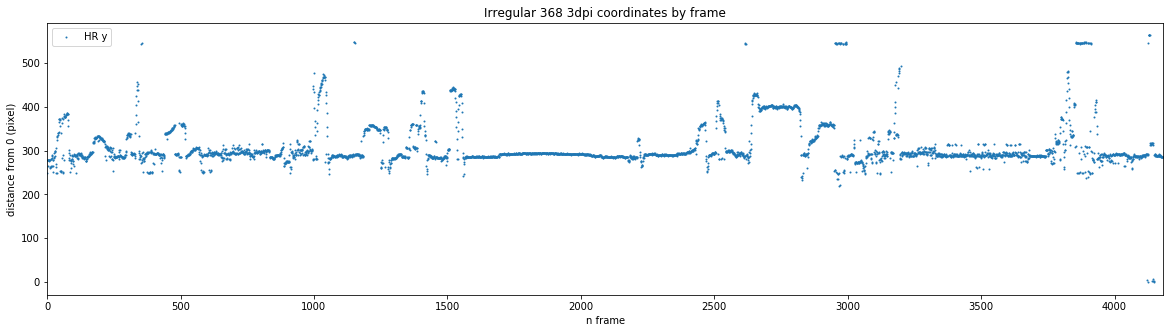

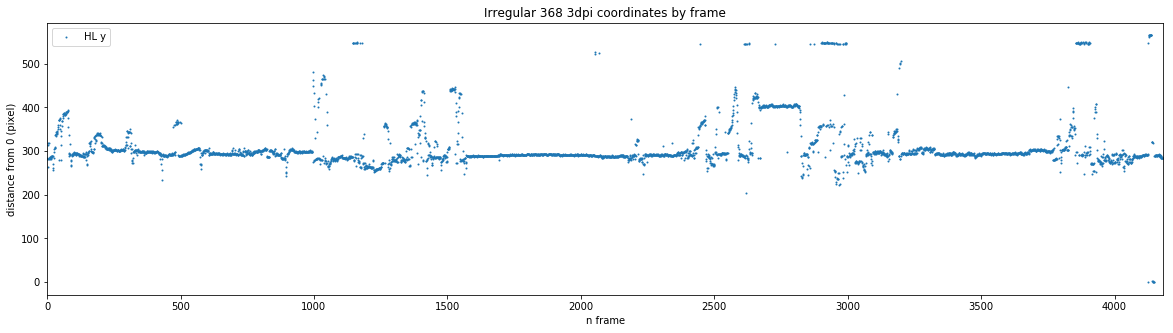

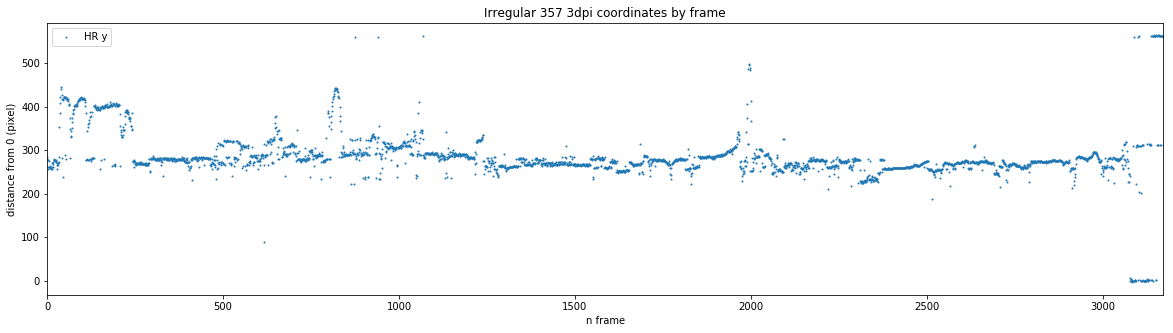

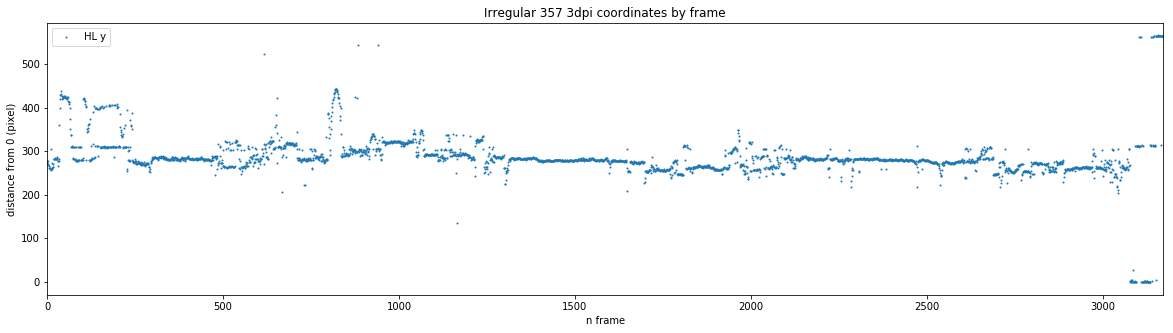

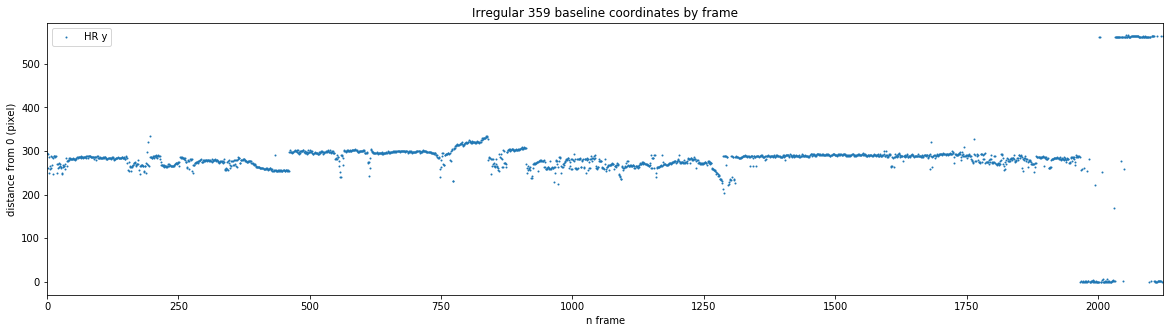

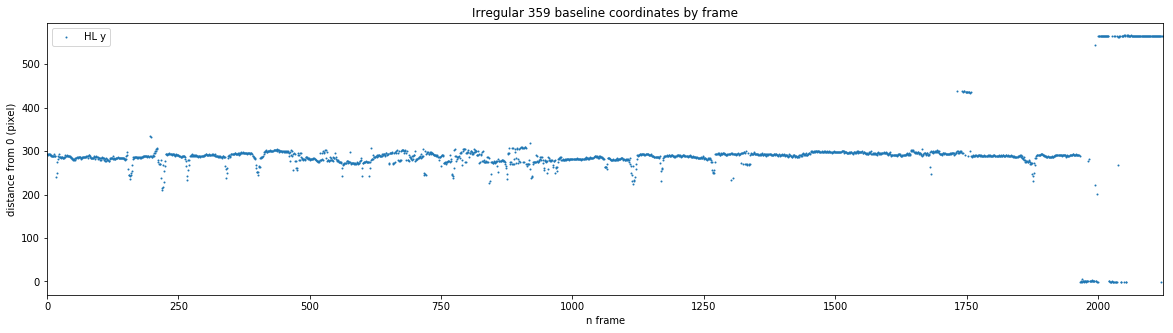

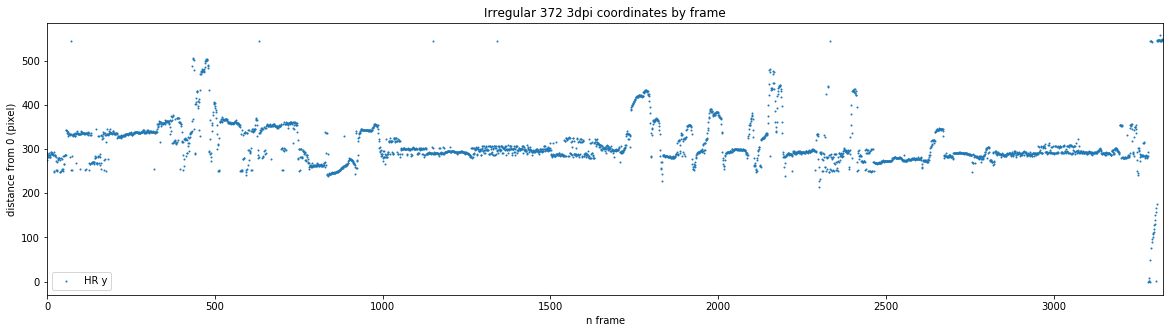

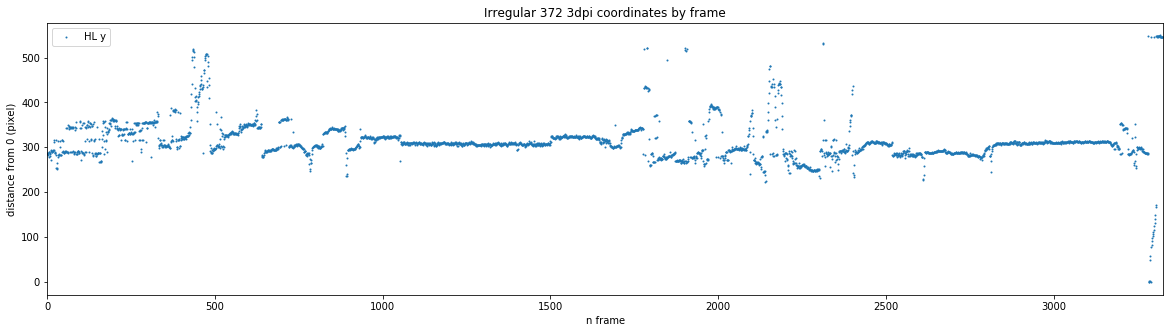

In [438]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, ['HL','HR'], start, end, filename, 'y', 1)
    plt.xlim((start, end))

/usr/lib/python3/dist-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


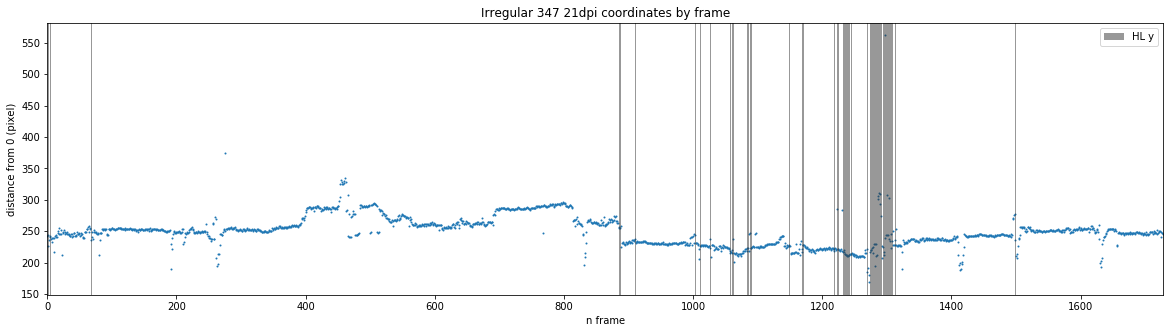

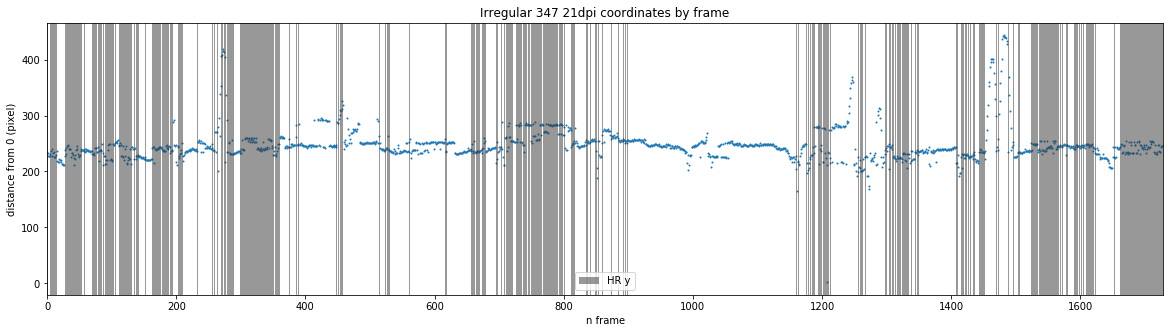

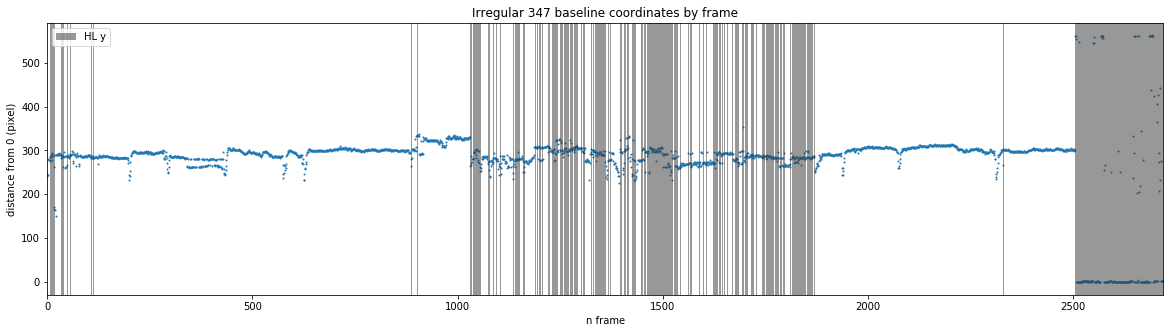

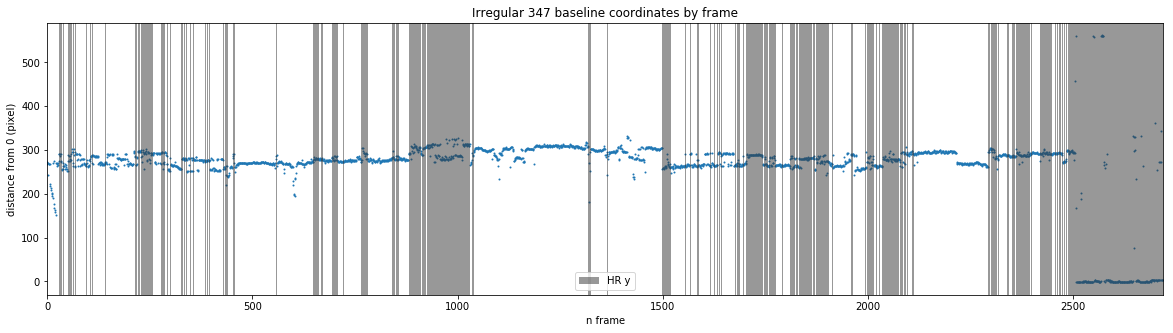

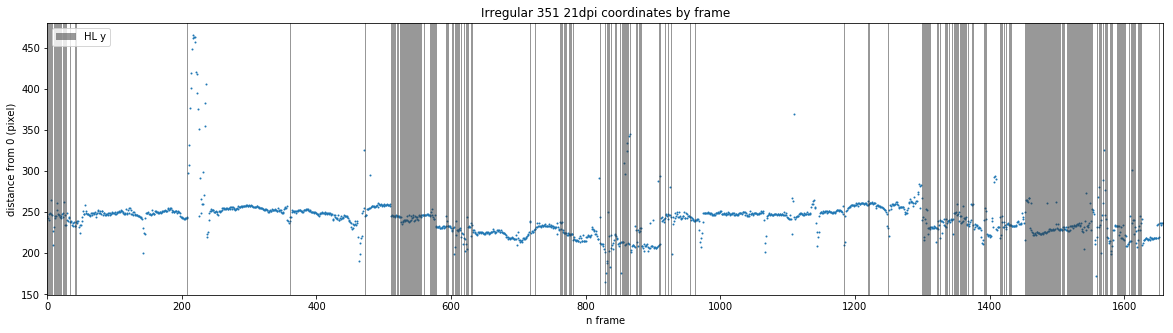

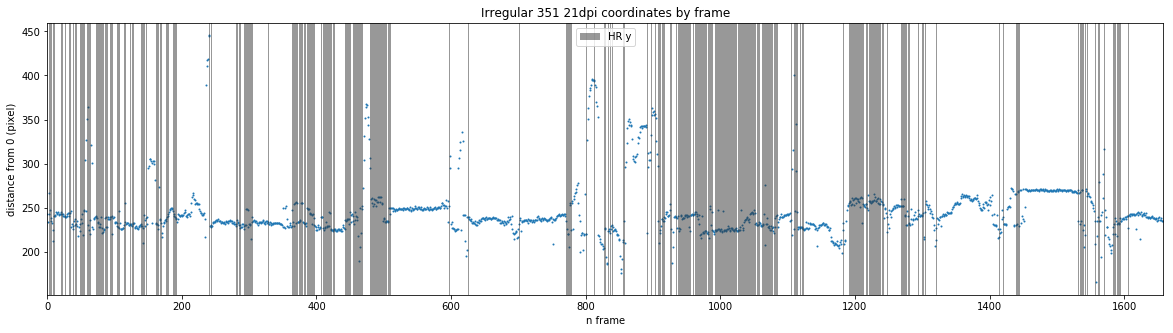

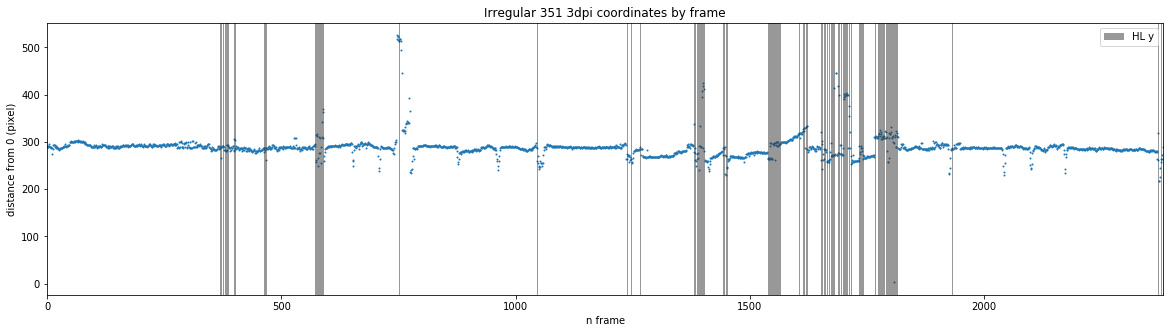

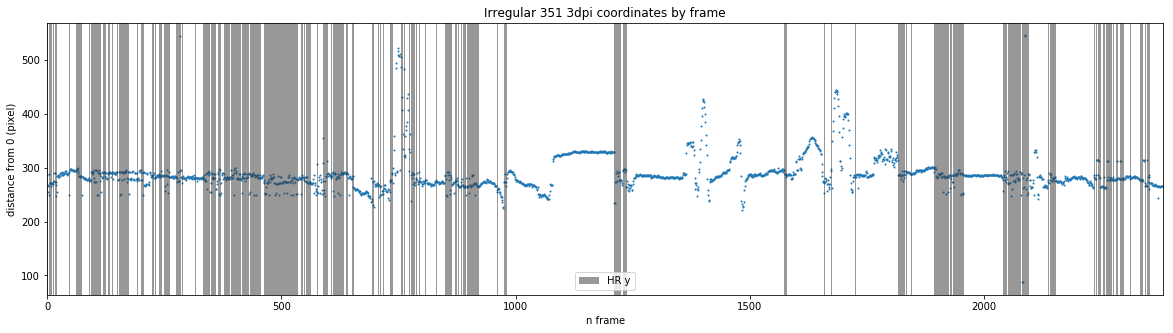

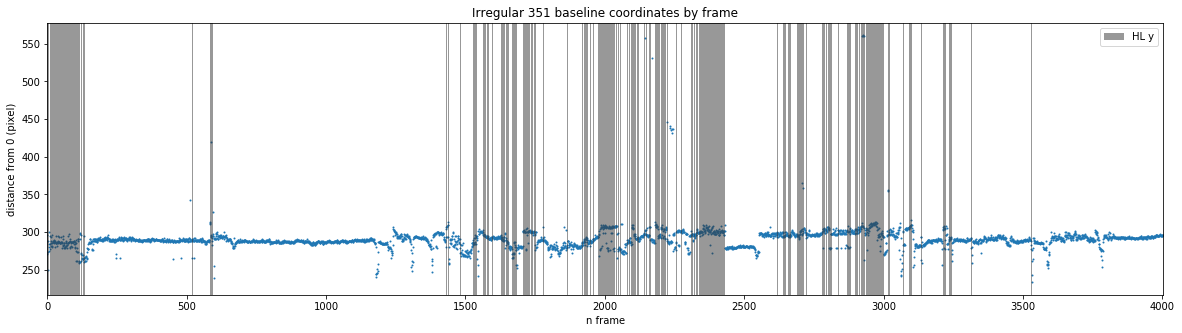

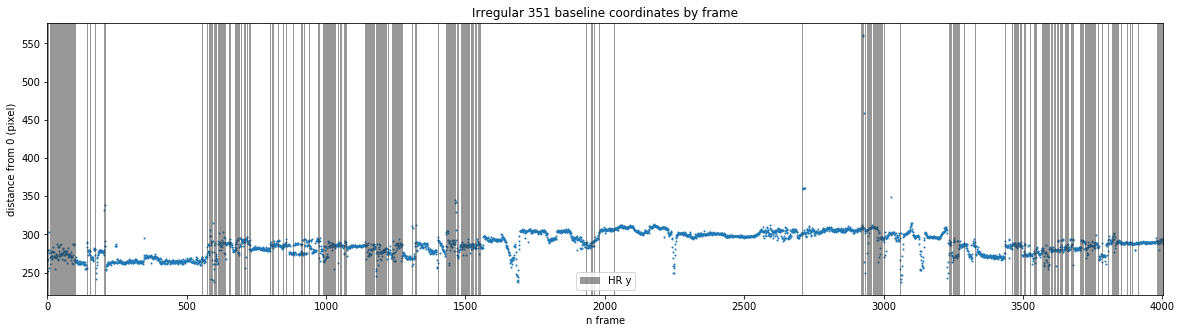

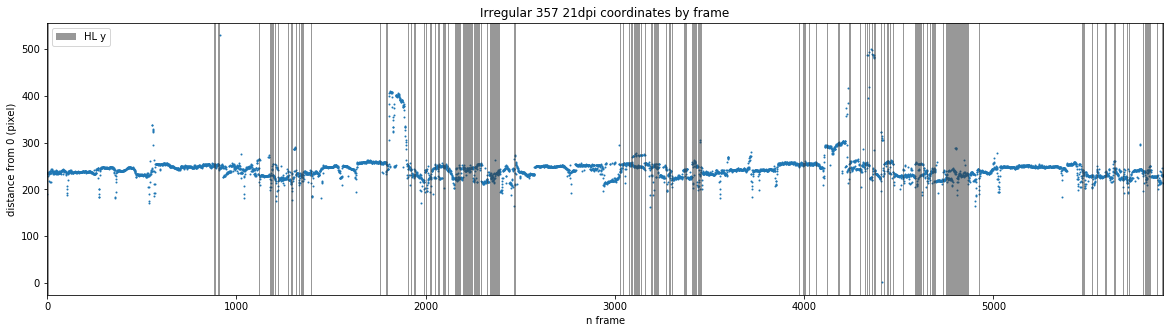

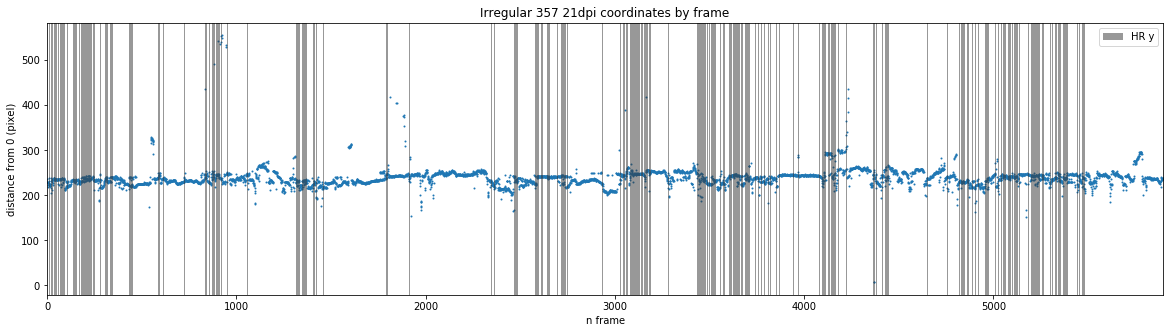

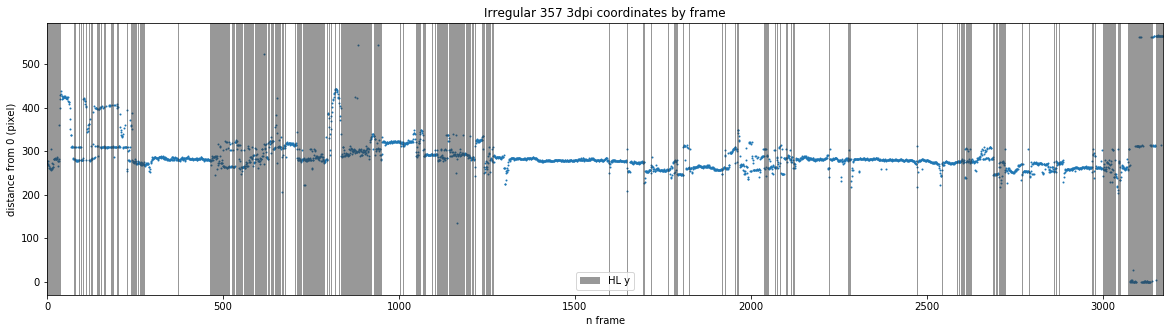

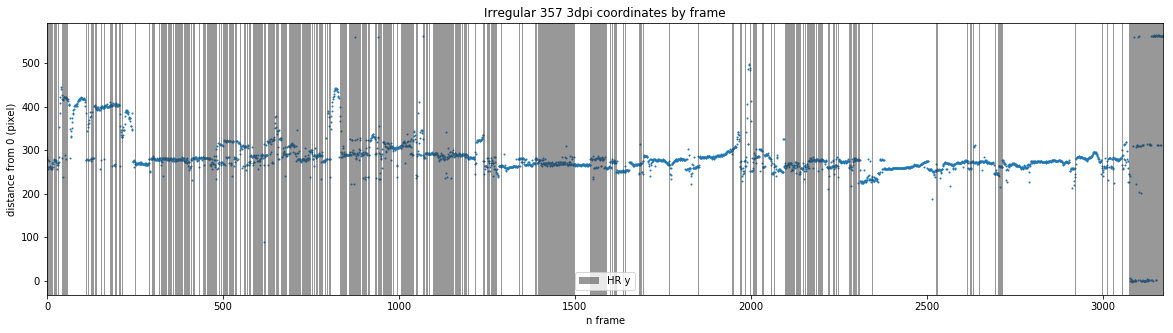

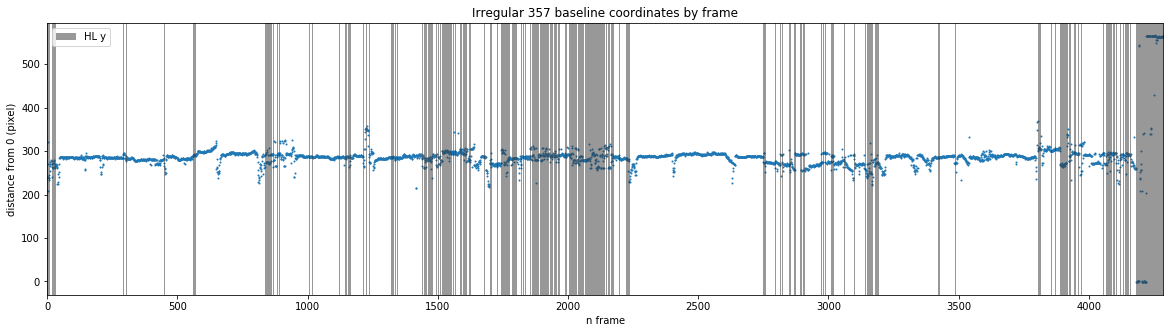

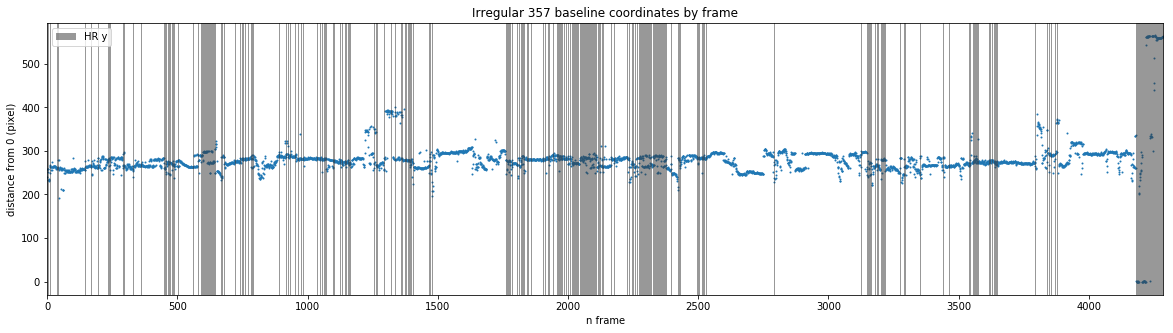

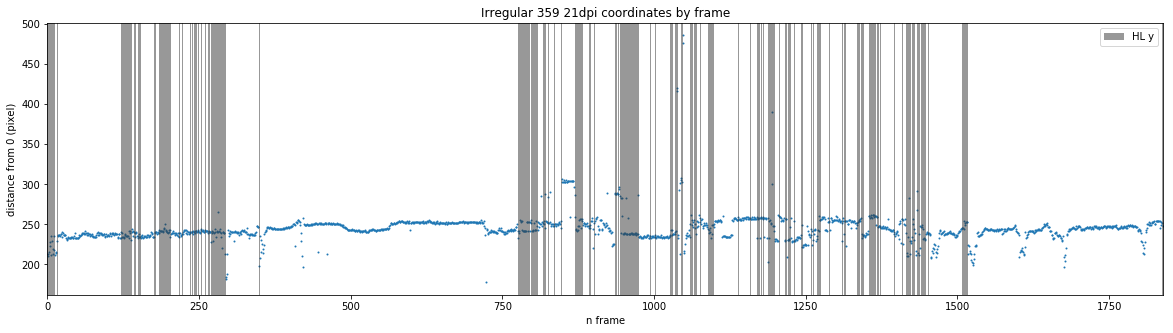

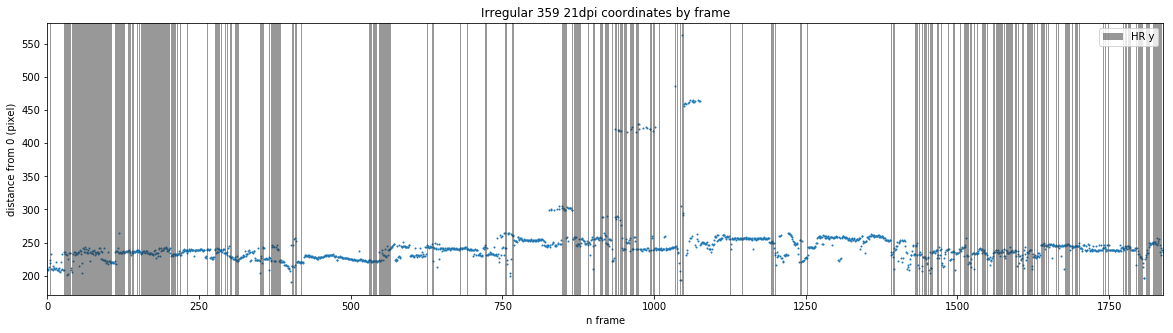

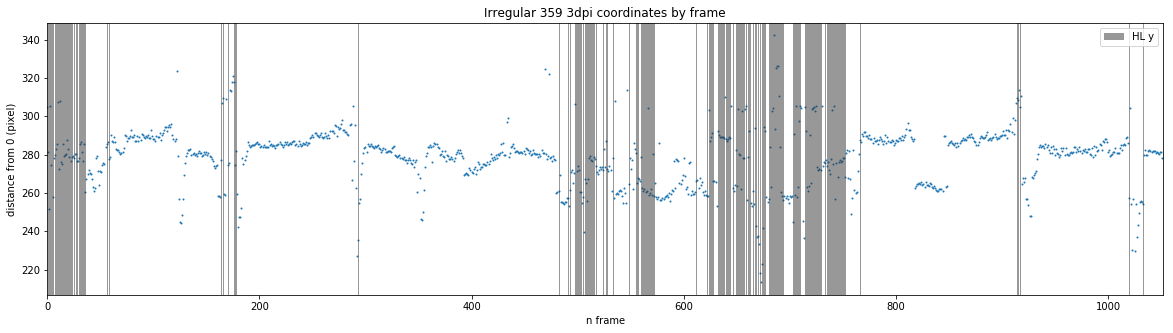

In [ ]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, 'HL', start, end, filename, 'y', 0.2)
    plt.xlim((start, end))
    
    plot_data(df, 'HR', start, end, filename, 'y', 0.2)
    plt.xlim((start, end))

In [ ]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, 'HL', start, end, filename, 'y', 0.3)
    plt.xlim((start, end))
    
    plot_data(df, 'HR', start, end, filename, 'y', 0.3)
    plt.xlim((start, end))

In [ ]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, 'HL', start, end, filename, 'y', 0.4)
    plt.xlim((start, end))
    
    plot_data(df, 'HR', start, end, filename, 'y', 0.4)
    plt.xlim((start, end))

In [ ]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, 'HL', start, end, filename, 'y', 0.5)
    plt.xlim((start, end))
    
    plot_data(df, 'HR', start, end, filename, 'y', 0.5)
    plt.xlim((start, end))

In [ ]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, 'HL', start, end, filename, 'y', 0.6)
    plt.xlim((start, end))
    
    plot_data(df, 'HR', start, end, filename, 'y', 0.6)
    plt.xlim((start, end))

In [ ]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, 'HL', start, end, filename, 'y', 0.7)
    plt.xlim((start, end))
    
    plot_data(df, 'HR', start, end, filename, 'y', 0.7)
    plt.xlim((start, end))

In [ ]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, 'HL', start, end, filename, 'y', 0.8)
    plt.xlim((start, end))
    
    plot_data(df, 'HR', start, end, filename, 'y', 0.8)
    plt.xlim((start, end))

In [ ]:
for i in range(len(file_list)):
    
    file = file_list[i]

    df, filename = read_file(file)
    df = fix_column_names(df)
    
    start = 0
    end = len(df)
    
    plot_data(df, 'HL', start, end, filename, 'y', 0.9)
    plt.xlim((start, end))
    
    plot_data(df, 'HR', start, end, filename, 'y', 0.9)
    plt.xlim((start, end))